In [60]:
%matplotlib notebook
# Dependencies
import os
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
#from config import (yelp_api_key,gkey)


In [61]:
#to get the different categories from categories.json in Resources

restaurant_categories = []

with open('Resources/categories.json') as json_file:
    cats = json.load(json_file)
    
    for category in cats:
        try:
            if category['parents'][0]=='restaurants':
                restaurant_categories.append(category['alias'])
            
        except Exception as e:
            #print(f'Restaurant not found. Skipping...')
            pass  # no operation

print(len(restaurant_categories))

190


In [62]:
cities = ["Carlsbad,CA", "Encinitas,CA", "Oceanside,CA"]
name_list = []
category_list = []
rating_list = []
review_count_list = []
price_list = []
total_count_dict = {
    "Oceanside,CA": [],
    "Encinitas,CA":[],
    "Carlsbad,CA":[]
}

city_list = []

for city in cities:
    print(city)
    
    for category in restaurant_categories:
      
        filename = f"Resources/{city}/{category}.json"
        #print(filename)
        with open(filename) as json_file:
            restaurants_json = json.load(json_file)
            total_count_dict[city].append(restaurants_json['total'])
            
            for restaurant in restaurants_json['businesses']:
                try:
                    city_list.append(city)
                    name_list.append(restaurant['name'])

                    category_list.append(category) 

                    review_count_list.append(restaurant['review_count'])
                    rating_list.append(restaurant['rating'])

                    #if restaurant does not have a restaurant['price'] value, provide a value (but how?)
                    #https://stackoverflow.com/questions/24898797/check-if-key-exists-and-iterate-the-json-array-using-python
                    if 'price' not in restaurant:
                        price_list.append("0")
                    else:
                        price_list.append(len(restaurant['price'])) #since price shows as symbol $$$
                except Exception as e:
                    print (e)

print(len(total_count_dict['Oceanside,CA']))                  
print(len(name_list))
print(len(category_list))
print(len(review_count_list))
print(len(rating_list))
print(len(price_list))

Carlsbad,CA
Encinitas,CA
Oceanside,CA
190
1463
1463
1463
1463
1463


In [63]:
restaurants_df = pd.DataFrame({
    "City": city_list,
    "Category": category_list,
    "Name": name_list,
    "Rating": rating_list,
    "Review Count": review_count_list,
    "Price":price_list
})
restaurants_df['Price']= pd.to_numeric(restaurants_df['Price'])
restaurants_df.head()

City     Category                           Name  Rating  \
0  Carlsbad,CA  asianfusion              Harumama Carlsbad     5.0   
1  Carlsbad,CA  asianfusion  Blue Ocean Robata & Sushi Bar     4.0   
2  Carlsbad,CA  asianfusion                          J BOX     4.0   
3  Carlsbad,CA  asianfusion                   P.F. Chang's     3.0   
4  Carlsbad,CA  asianfusion                    Super Sushi     4.0   

   Review Count  Price  
0             5      0  
1           902      2  
2            89      2  
3           441      2  
4           206      2

In [64]:
#Total Restaurant Count per Category
total_restaurant_df = pd.DataFrame(total_count_dict)
total_restaurant_df['Category'] = restaurant_categories
total_restaurant_df = total_restaurant_df.set_index('Category')
total_restaurant_df.head()

Oceanside,CA  Encinitas,CA  Carlsbad,CA
Category                                           
afghani                1             0            0
african                0             0            0
andalusian             0             0            0
arabian                0             0            0
argentine              0             0            0

In [65]:
#Restaurant Count Per Category - Oceanside
oceanside_total_restaurant_df = total_restaurant_df.loc[:,['Oceanside,CA']]
oceanside_total_restaurant_df = oceanside_total_restaurant_df.loc[~oceanside_total_restaurant_df.apply(lambda row: (row==0).all(), axis=1)]
oceanside_total_restaurant_df.sort_values('Oceanside,CA',ascending=False,inplace=True)
oceanside_total_restaurant_df.head()
#Top 20 
top20count_oceanside = oceanside_total_restaurant_df.iloc[:20]
top20count_oceanside.head()

Oceanside,CA
Category                
mexican               80
hotdogs               73
sandwiches            47
pizza                 44
burgers               37

<IPython.core.display.Javascript object>


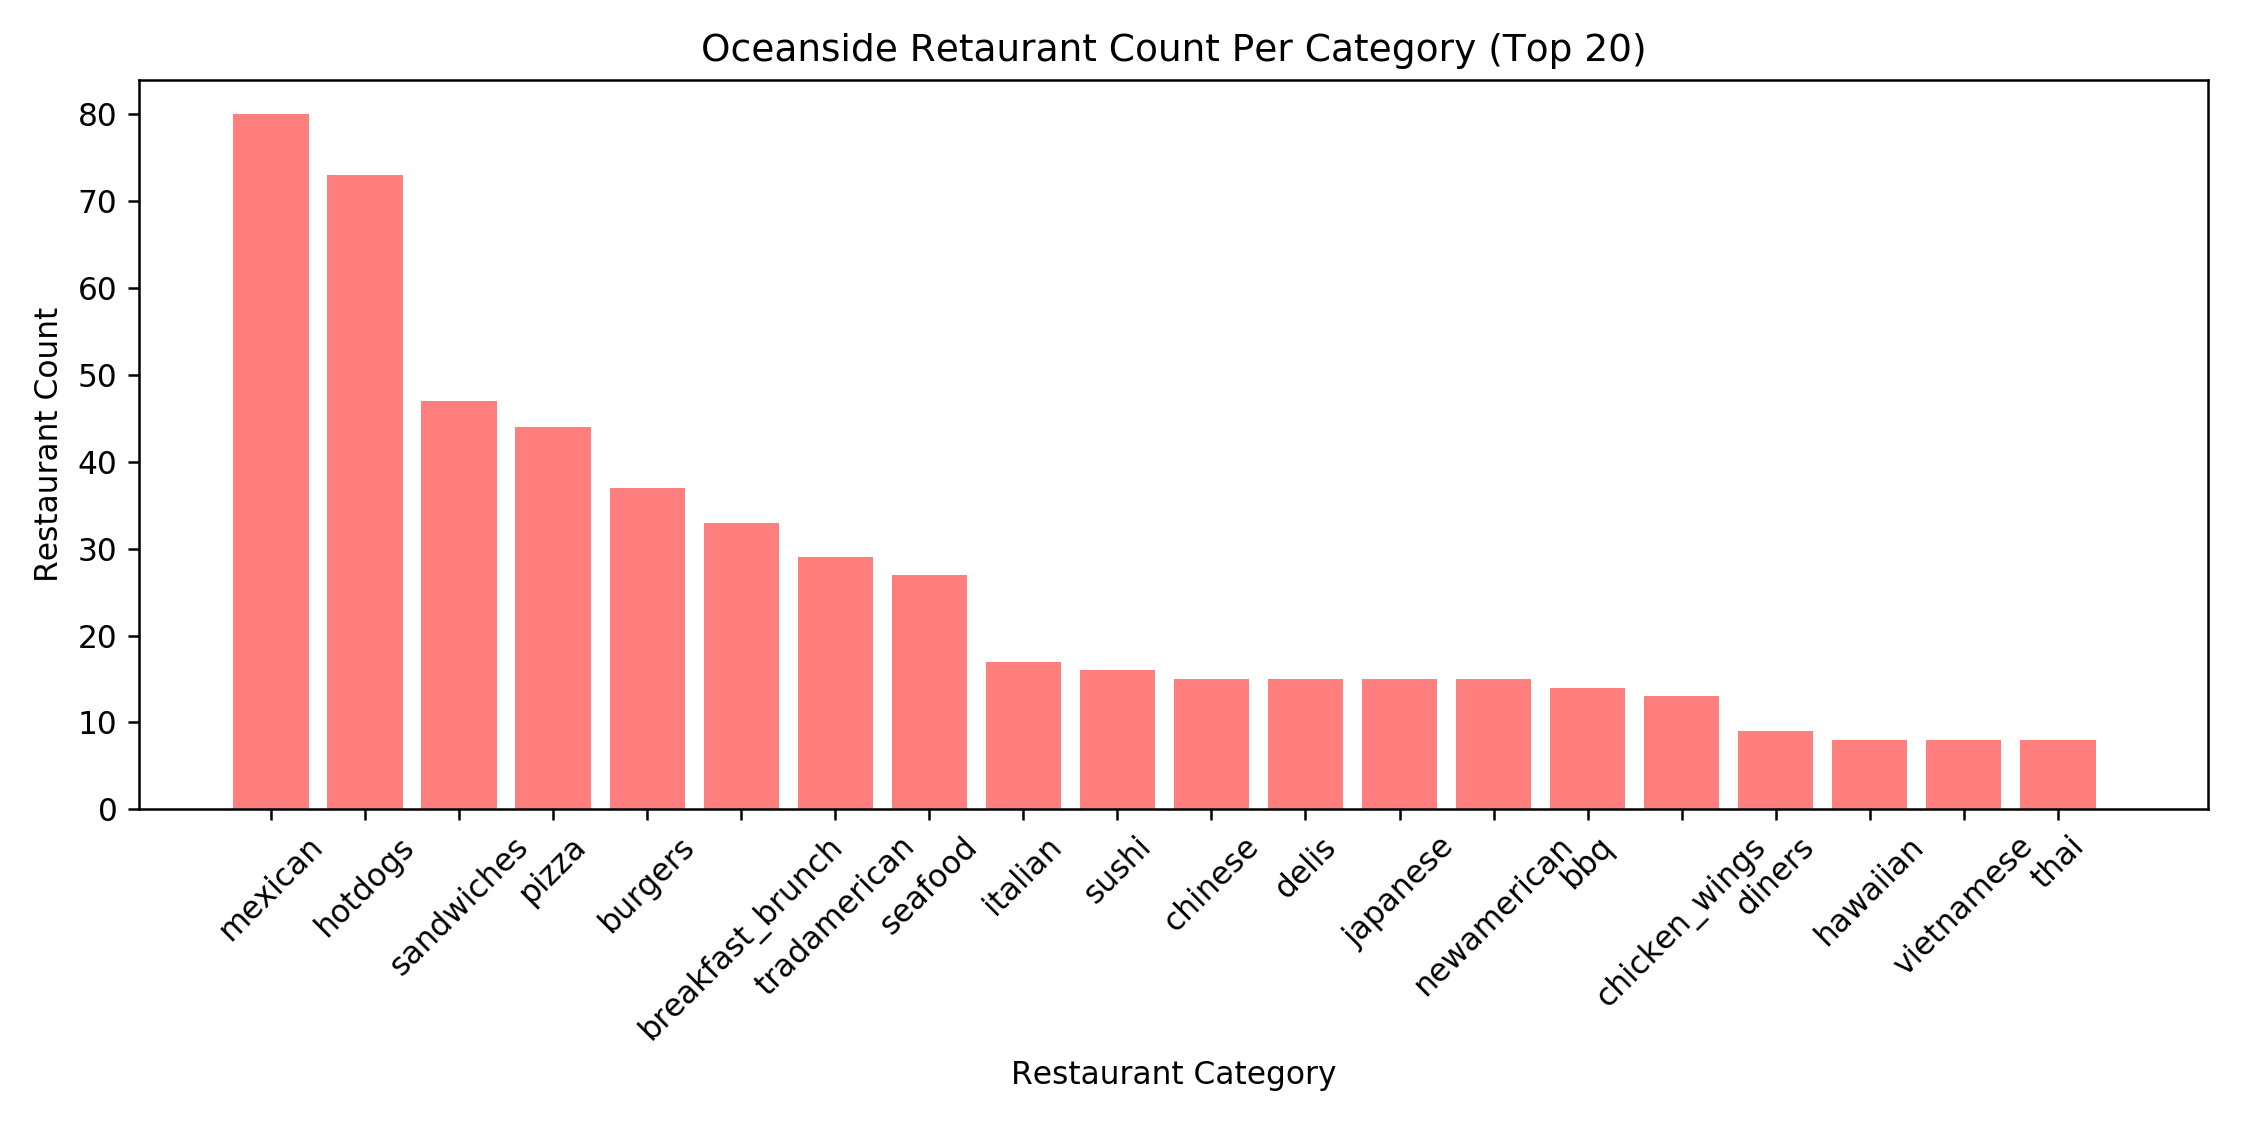

In [66]:
Oceanside_top20count = top20count_oceanside.reset_index()
x_axis = np.arange(len(Oceanside_top20count['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, Oceanside_top20count["Oceanside,CA"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, Oceanside_top20count['Category'], rotation=45)
plt.xlim(-1, len(Oceanside_top20count) +1)
plt.title("Oceanside Retaurant Count Per Category (Top 20)")
plt.xlabel("Restaurant Category")
plt.ylabel("Restaurant Count")
plt.tight_layout()
plt.savefig('oceanside_top20_count.png')
plt.show()

In [67]:
#Total Restaurants per Category - Carlsbad
carlsbad_total_restaurant_df = total_restaurant_df.loc[:,['Carlsbad,CA']]
carlsbad_total_restaurant_df = carlsbad_total_restaurant_df.loc[~carlsbad_total_restaurant_df.apply(lambda row: (row==0).all(), axis=1)]
carlsbad_total_restaurant_df.sort_values('Carlsbad,CA',ascending=False,inplace=True)
carlsbad_total_restaurant_df.head()
#Top 20
top20count_carlsbad = carlsbad_total_restaurant_df.iloc[:20]
top20count_carlsbad.head()

Carlsbad,CA
Category                
sandwiches            48
hotdogs               35
newamerican           32
mexican               32
salad                 27

<IPython.core.display.Javascript object>


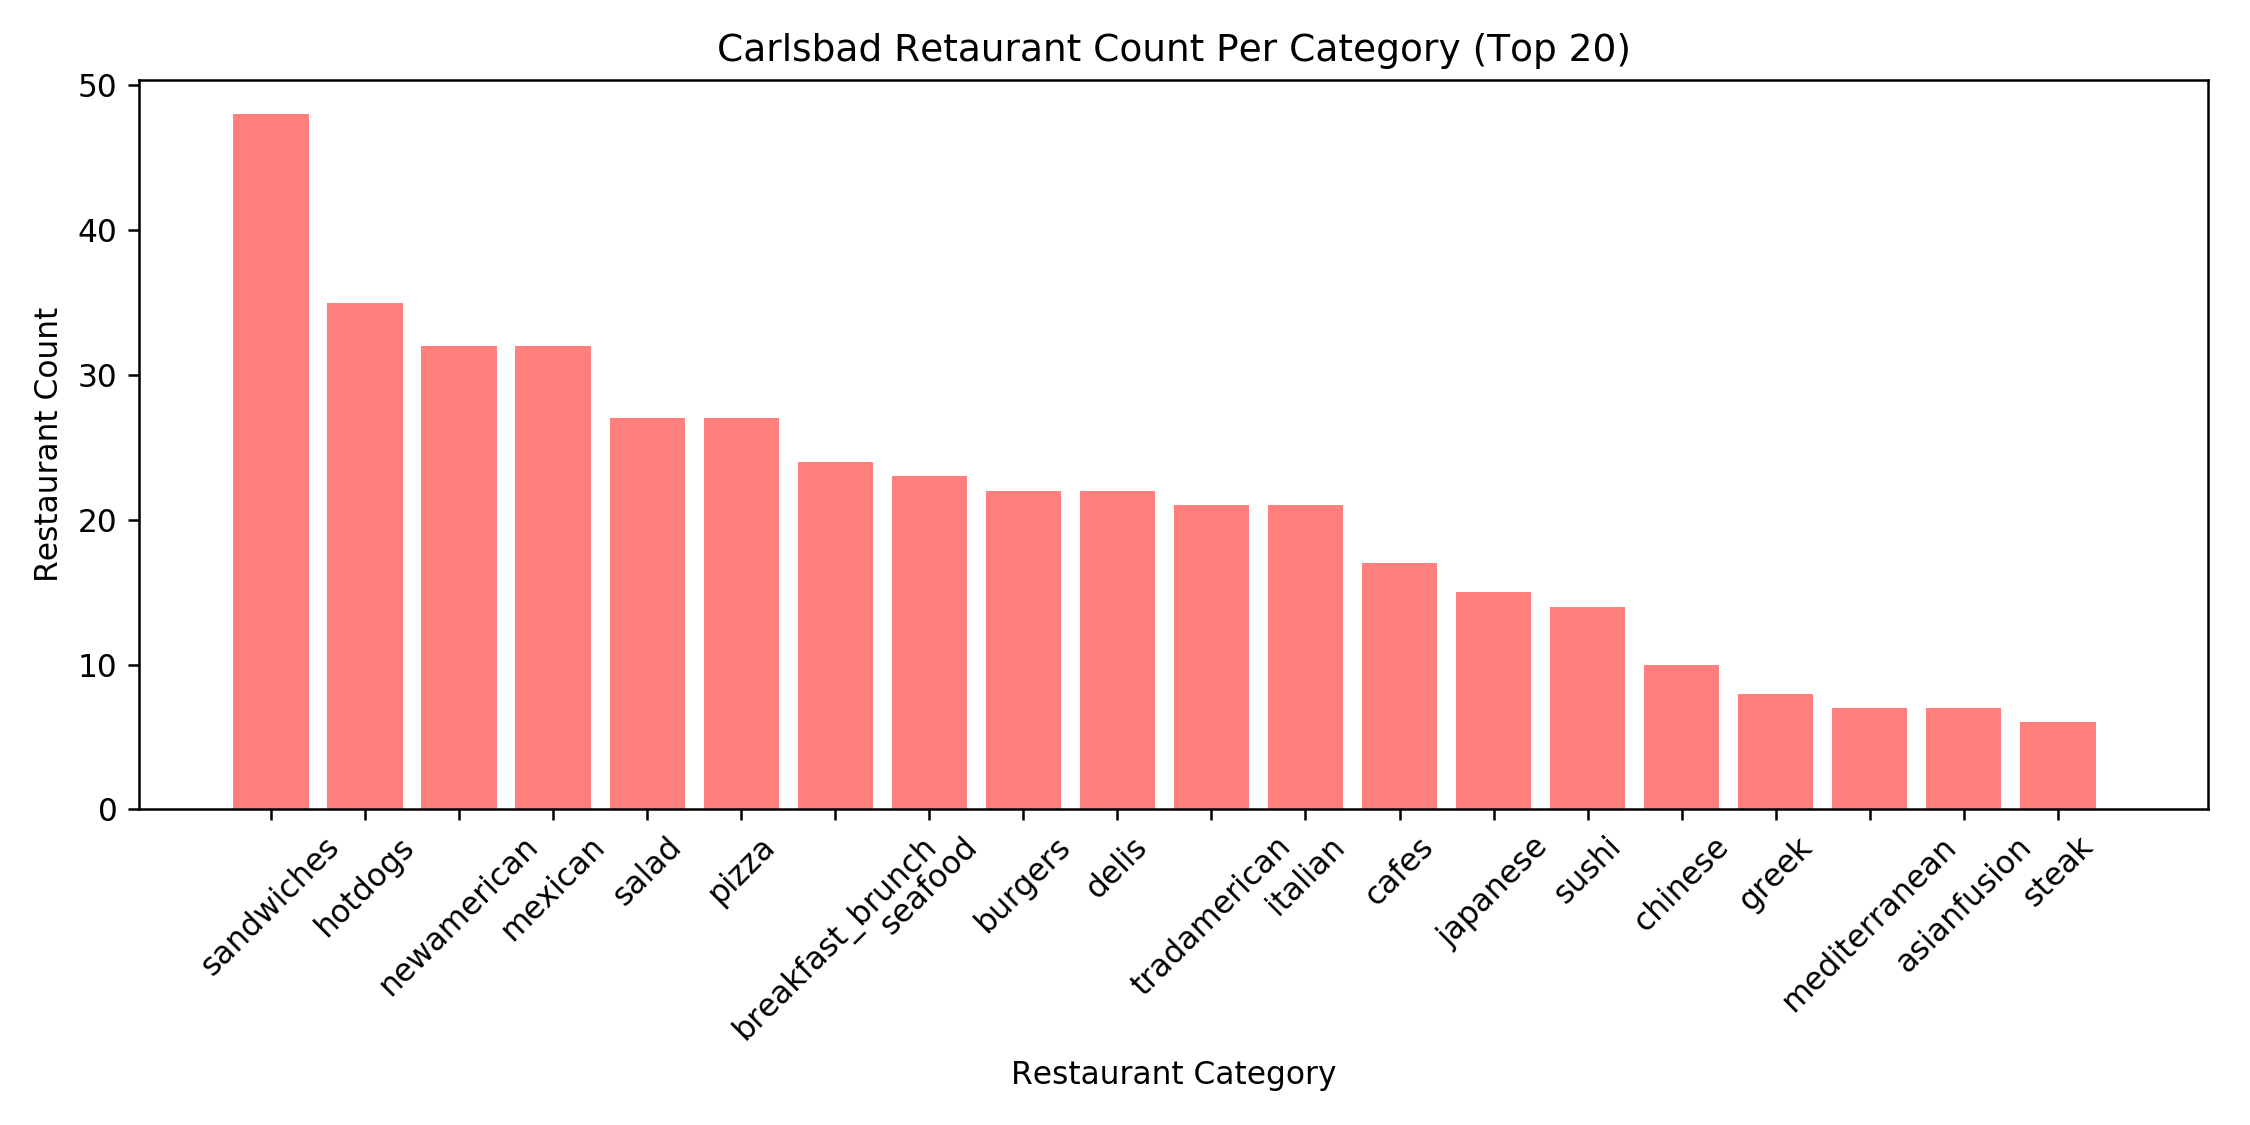

In [68]:
Carlsbad_top20count = top20count_carlsbad.reset_index()
x_axis = np.arange(len(Carlsbad_top20count['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, Carlsbad_top20count["Carlsbad,CA"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, Carlsbad_top20count['Category'], rotation=45)
plt.xlim(-1, len(Carlsbad_top20count) +1)
plt.title("Carlsbad Retaurant Count Per Category (Top 20)")
plt.xlabel("Restaurant Category")
plt.ylabel("Restaurant Count")
plt.tight_layout()
plt.savefig('carlsbad_top20_count.png')
plt.show()

In [69]:
#get top 20 categories in Encinitas
encinitas_total_restaurant_df = total_restaurant_df.loc[:,['Encinitas,CA']]
encinitas_total_restaurant_df = encinitas_total_restaurant_df.loc[~encinitas_total_restaurant_df.apply(lambda row: (row==0).all(), axis=1)]
encinitas_total_restaurant_df.sort_values('Encinitas,CA',ascending=False,inplace=True)
encinitas_total_restaurant_df.head(20)
#Top 20
top20count_encinitas = encinitas_total_restaurant_df.iloc[:20]
top20count_encinitas.head()

Encinitas,CA
Category                      
mexican                     28
hotdogs                     28
sandwiches                  22
breakfast_brunch            20
pizza                       20

<IPython.core.display.Javascript object>


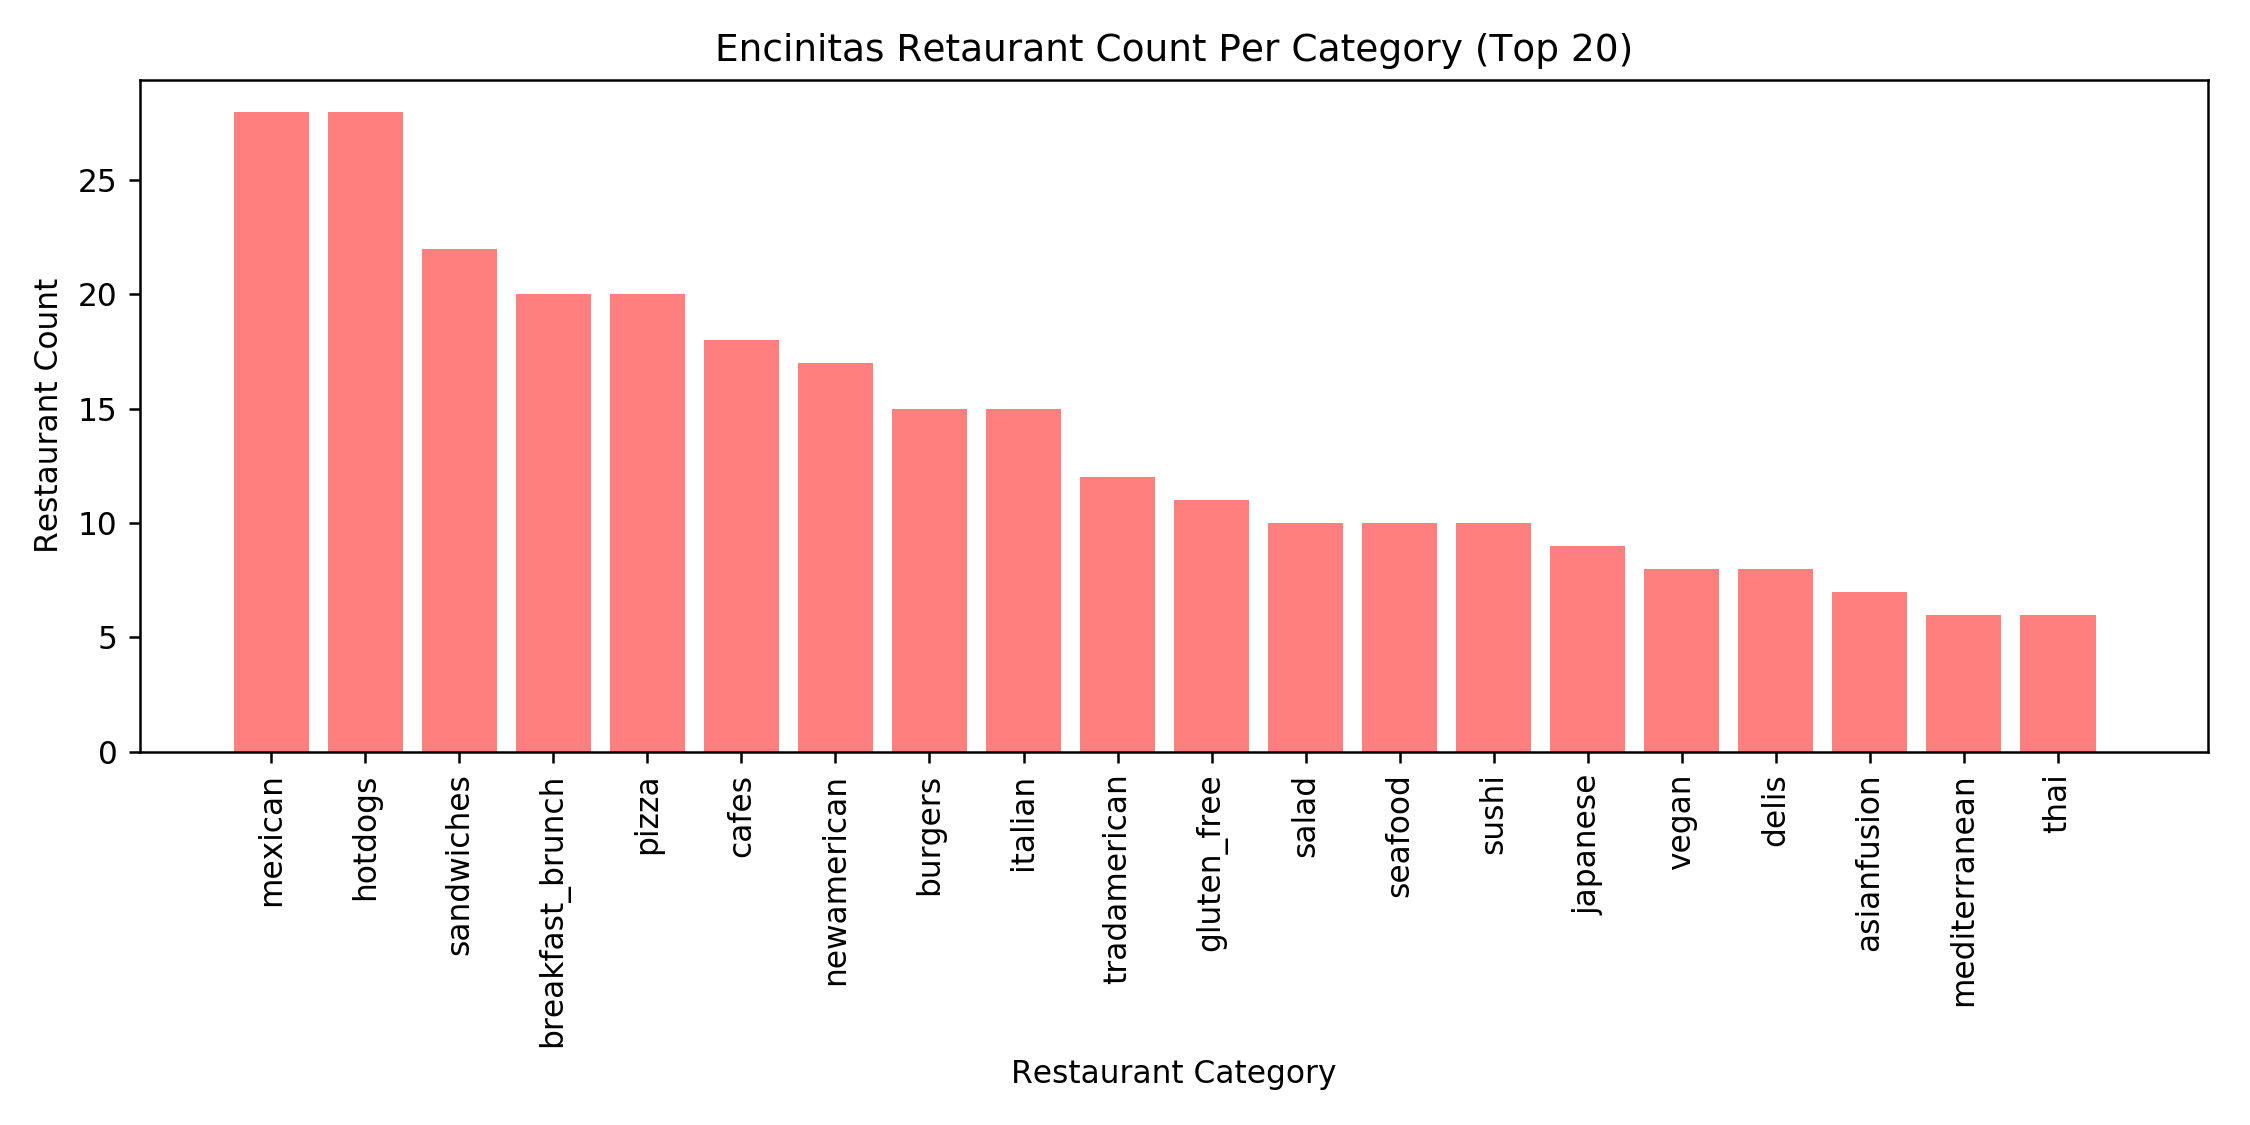

In [70]:
Encinitas_top20count = top20count_encinitas.reset_index()
x_axis = np.arange(len(Encinitas_top20count['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, Encinitas_top20count["Encinitas,CA"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, Encinitas_top20count['Category'], rotation='vertical')
plt.xlim(-1, len(Encinitas_top20count) +1)
plt.title("Encinitas Retaurant Count Per Category (Top 20)")
plt.xlabel("Restaurant Category")
plt.ylabel("Restaurant Count")
plt.tight_layout()
plt.savefig('encinitas_top20_count.png')
plt.show()

In [71]:
OC_top20_count = pd.merge(top20count_oceanside,top20count_carlsbad, on="Category", how="outer")
OCE_top20_count = pd.merge(OC_top20_count,top20count_encinitas, on="Category", how="outer")
OCE_top20_count.head()

Oceanside,CA  Carlsbad,CA  Encinitas,CA
Category                                           
mexican             80.0         32.0          28.0
hotdogs             73.0         35.0          28.0
sandwiches          47.0         48.0          22.0
pizza               44.0         27.0          20.0
burgers             37.0         22.0          15.0

<IPython.core.display.Javascript object>


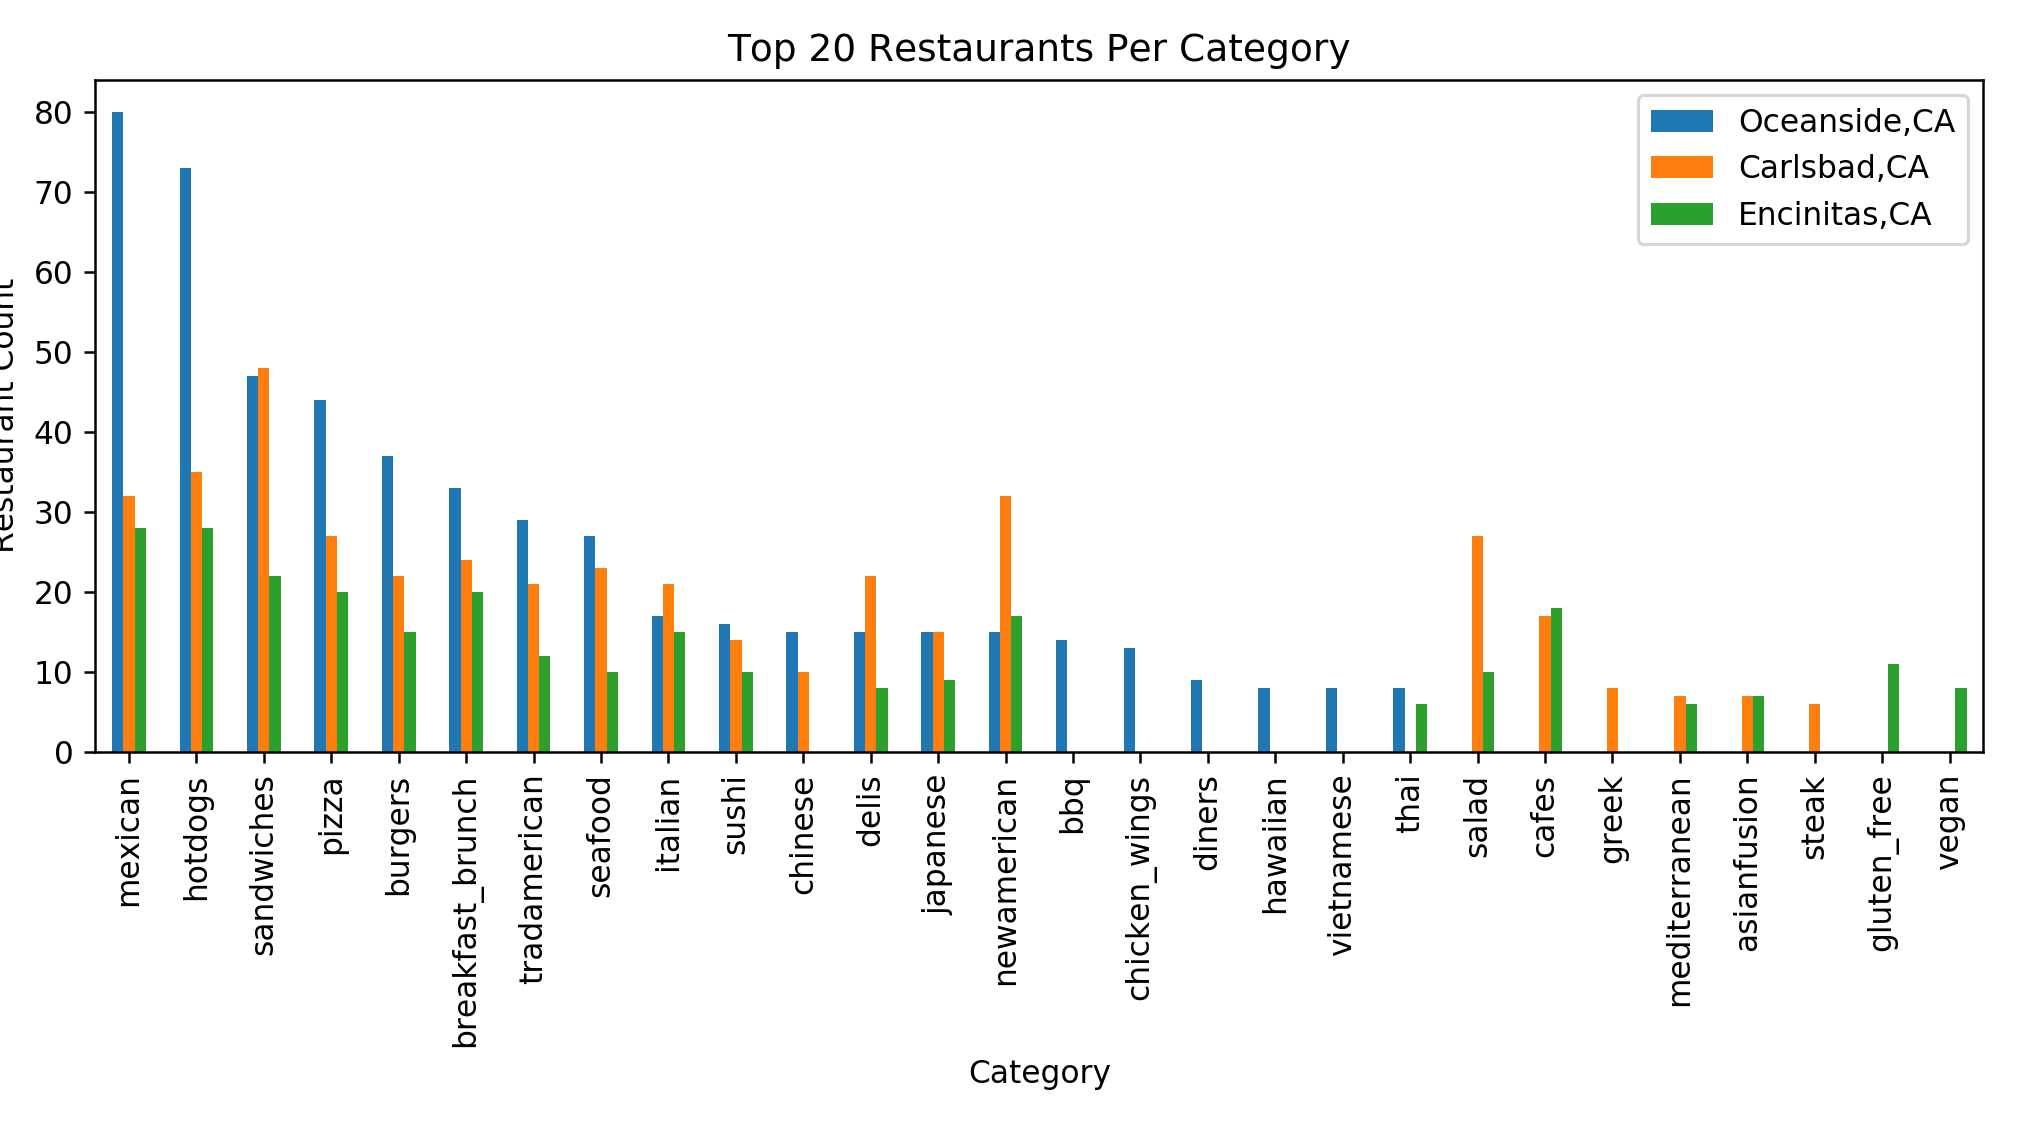

In [139]:
OCE_top20_count.plot(kind='bar', figsize=(9,5))
plt.title('Top 20 Restaurants Per Category')
plt.tight_layout()
plt.ylabel('Restaurant Count')
plt.savefig('new_OCE_top20_count.png')

In [73]:
#Restaurants Rating

In [74]:
#Restaurant Rating - Oceanside
oceanside_df = restaurants_df.loc[(restaurants_df["City"]=="Oceanside,CA") & (restaurants_df["Review Count"]>= 20),:]
oceanside_restaurant_rating = oceanside_df.groupby("Category")['Rating'].agg('mean')
oceanside_restaurant_rating = pd.DataFrame(oceanside_restaurant_rating)
oceanside_restaurant_rating.head()

Rating
Category                  
asianfusion       3.666667
bbq               4.045455
breakfast_brunch  3.828125
buffets           3.166667
burgers           3.015152

<IPython.core.display.Javascript object>


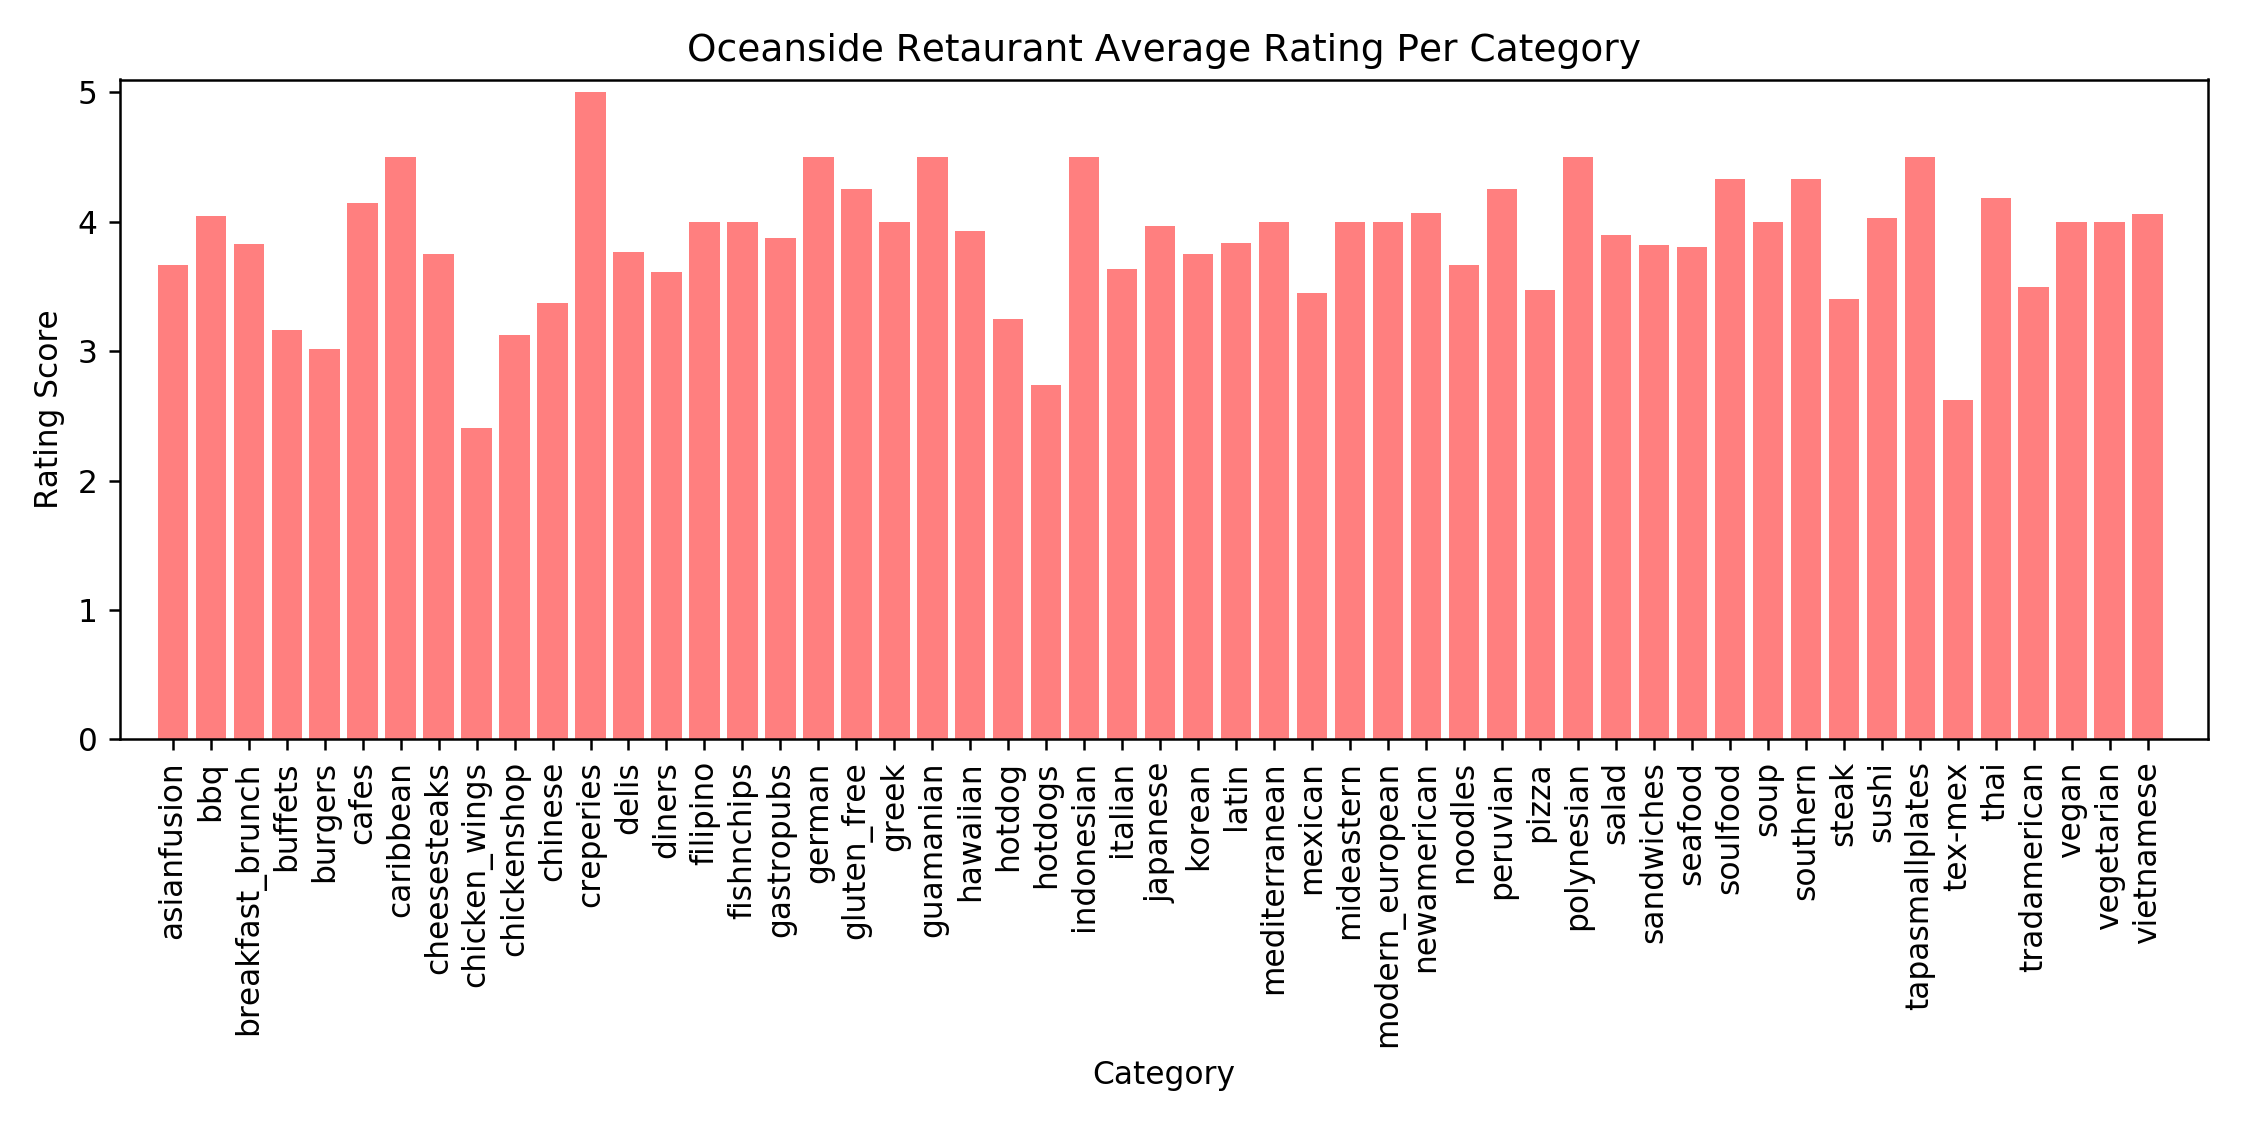

In [75]:
O_restaurant_rating_mean = oceanside_restaurant_rating.reset_index()
x_axis = np.arange(len(O_restaurant_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, O_restaurant_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, O_restaurant_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(O_restaurant_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Oceanside Retaurant Average Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('oceanside_avg_rating.png')
plt.show()

In [76]:
#Restaurant Rating - Carlsbad
carlsbad_df = restaurants_df.loc[(restaurants_df["City"]=="Carlsbad,CA") & (restaurants_df["Review Count"]>= 20),:]
carlsbad_restaurant_rating = carlsbad_df.groupby("Category")['Rating'].agg('mean')
carlsbad_restaurant_rating_df = pd.DataFrame(carlsbad_restaurant_rating)
carlsbad_restaurant_rating_df.head()

Rating
Category                  
asianfusion       3.583333
bbq               3.400000
breakfast_brunch  3.770833
buffets           3.625000
burgers           3.425000

<IPython.core.display.Javascript object>


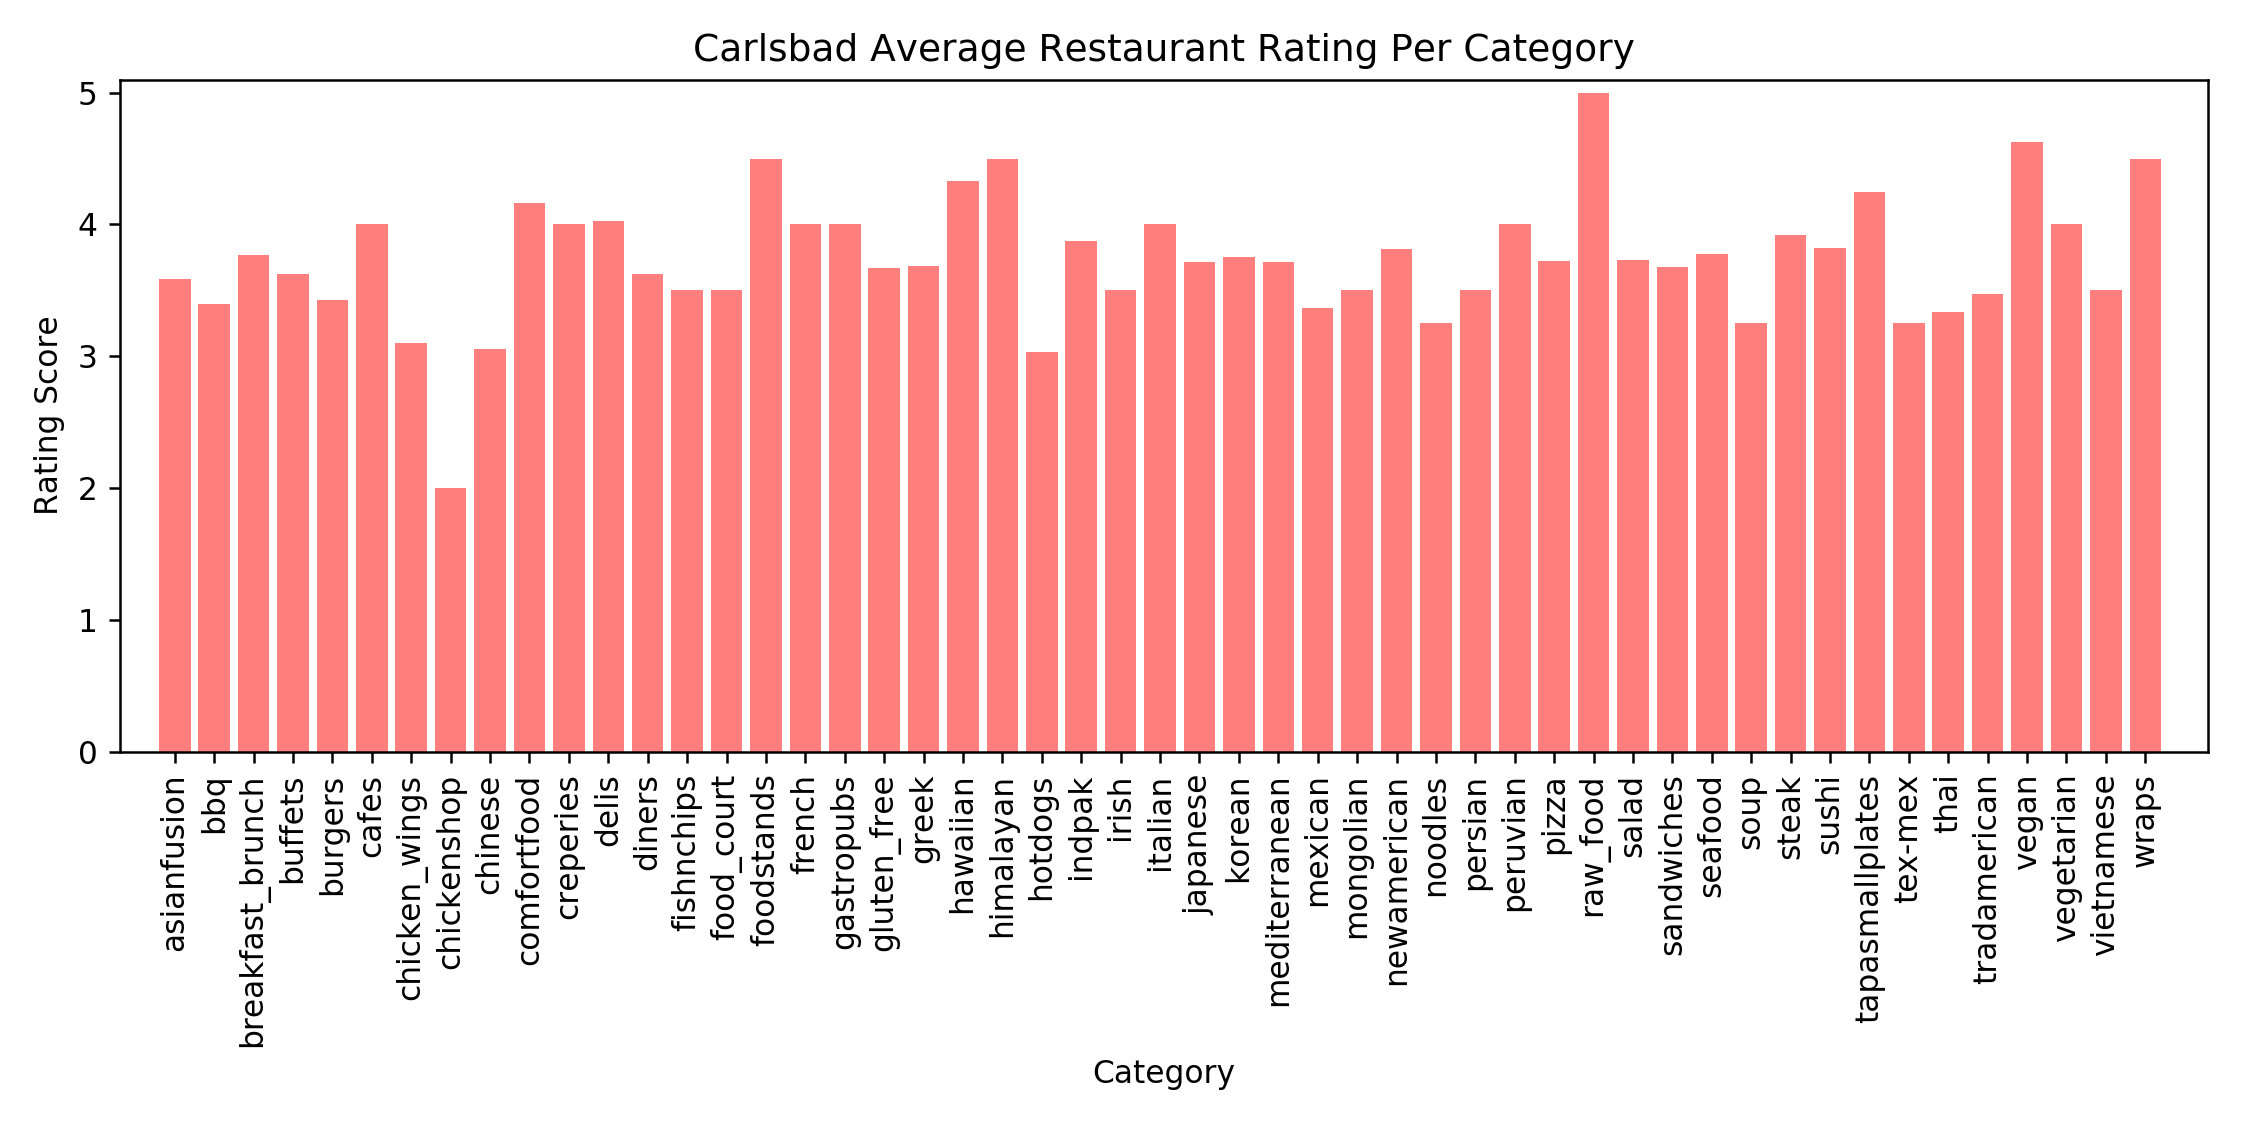

In [77]:
C_restaurant_rating_mean = carlsbad_restaurant_rating_df.reset_index()
x_axis = np.arange(len(C_restaurant_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, C_restaurant_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, C_restaurant_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(C_restaurant_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Carlsbad Average Restaurant Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('carlsbad_avg_rating.png')
plt.show()

In [78]:
#Restaurant Rating - Encinitas
encinitas_df = restaurants_df.loc[(restaurants_df["City"]=="Encinitas,CA") & (restaurants_df["Review Count"]>= 20),:]
encinitas_restaurant_rating = encinitas_df.groupby("Category")['Rating'].agg('mean')
encinitas_restaurant_rating_df = pd.DataFrame(encinitas_restaurant_rating)
encinitas_restaurant_rating_df.head()

Rating
Category                  
asianfusion       3.833333
brazilian         4.000000
breakfast_brunch  3.775000
buffets           3.000000
burgers           3.366667

<IPython.core.display.Javascript object>


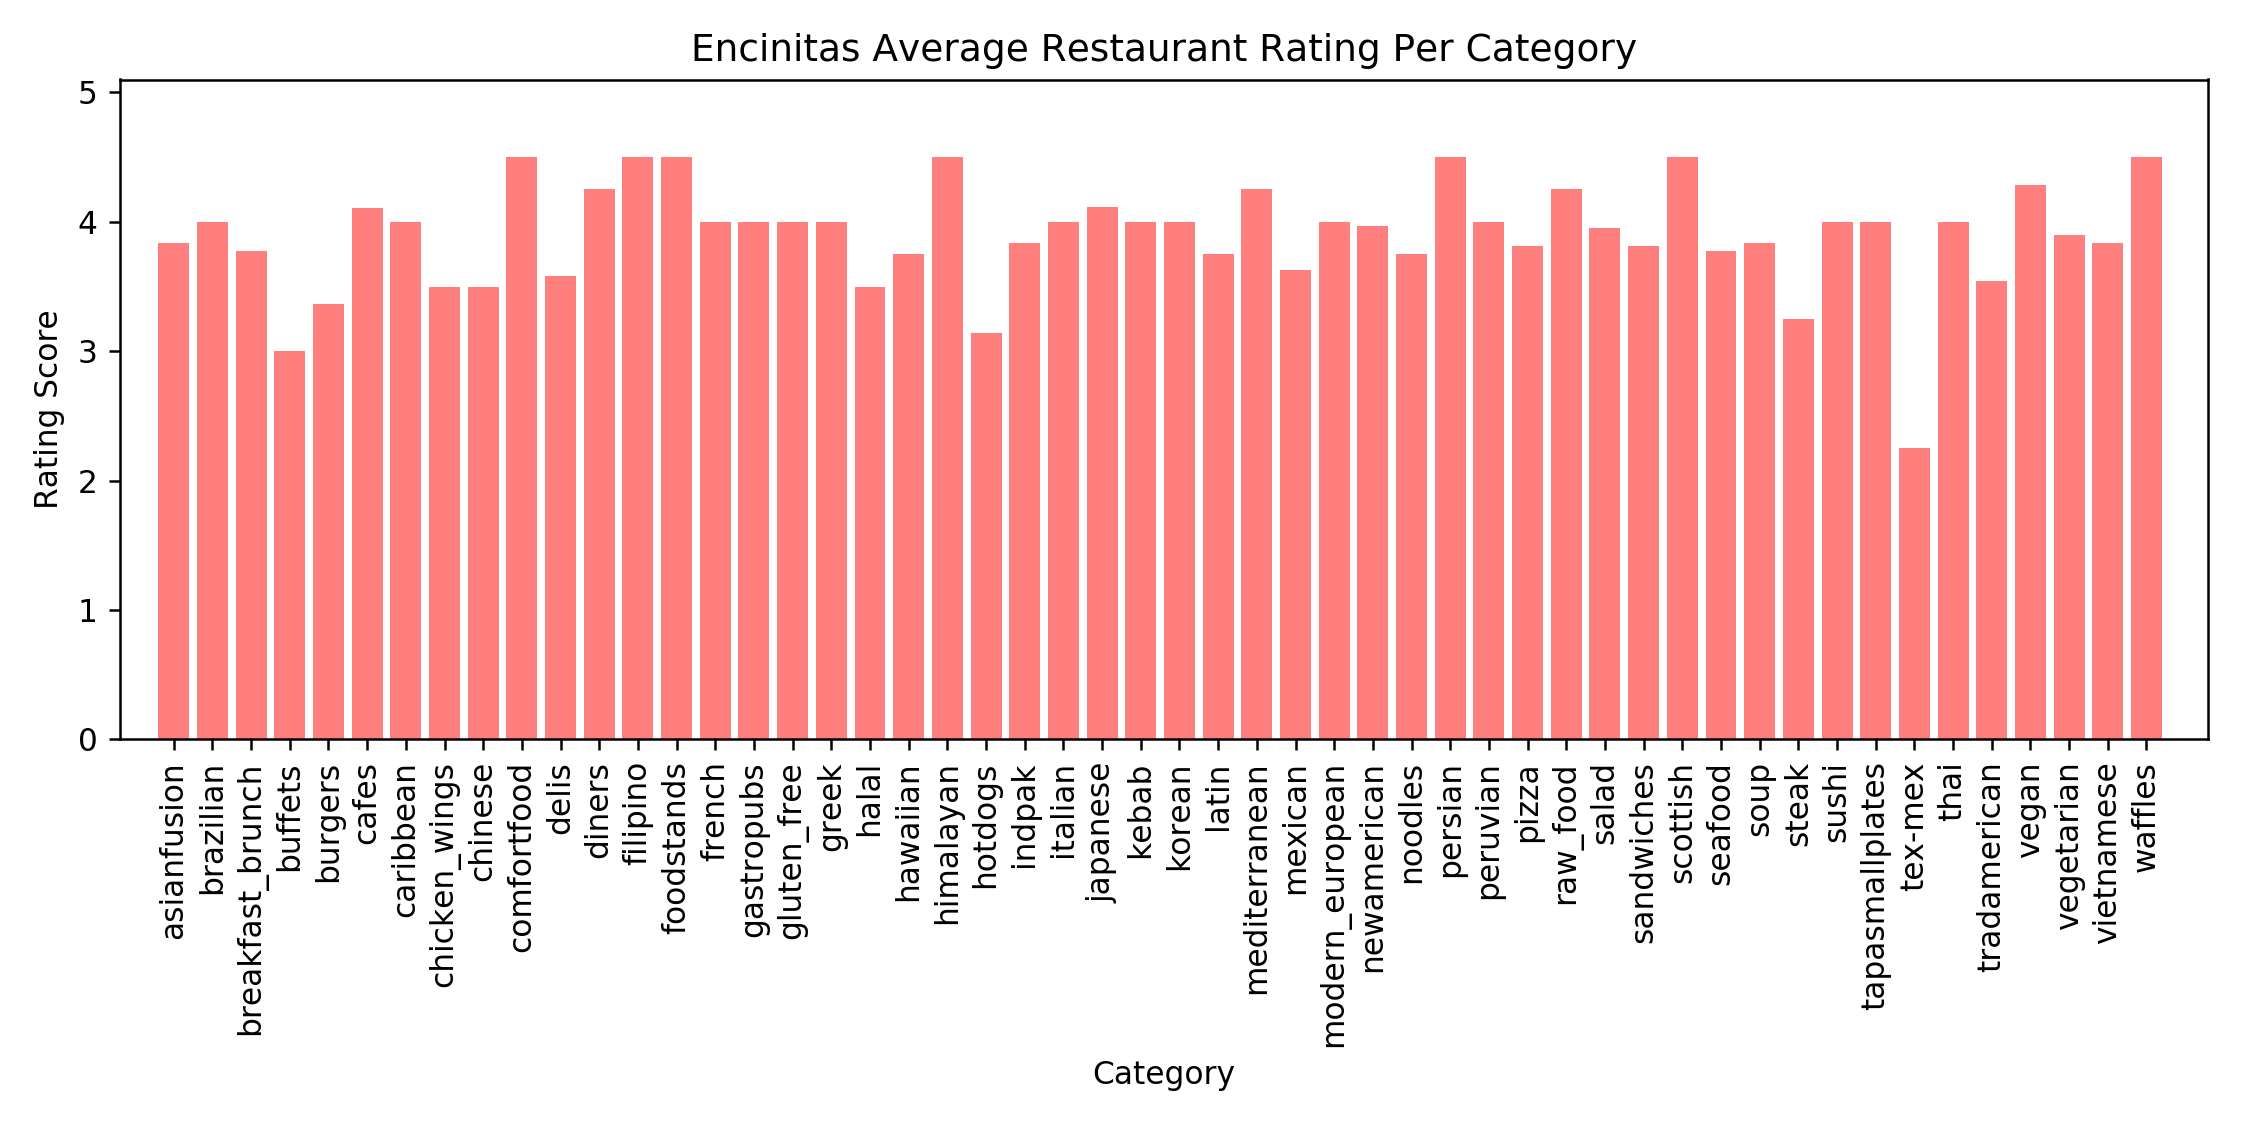

In [79]:
E_restaurant_rating_mean = encinitas_restaurant_rating_df.reset_index()
x_axis = np.arange(len(E_restaurant_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, E_restaurant_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, E_restaurant_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(E_restaurant_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Encinitas Average Restaurant Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('encinitas_avg_rating.png')
plt.show()

In [80]:
#Merged Files - Restaurant Rating Oceanside, Carlsbad
restaurant_rating = pd.merge(oceanside_restaurant_rating,carlsbad_restaurant_rating_df, on="Category", how="outer")
restaurant_rating_df = restaurant_rating.rename(columns={"Rating_x": "Avg Oceanside Restaurant Rating", "Rating_y":"Avg Carlsbad Restaurant Rating"})
restaurant_rating_df.head()

Avg Oceanside Restaurant Rating  \
Category                                            
asianfusion                              3.666667   
bbq                                      4.045455   
breakfast_brunch                         3.828125   
buffets                                  3.166667   
burgers                                  3.015152   

                  Avg Carlsbad Restaurant Rating  
Category                                          
asianfusion                             3.583333  
bbq                                     3.400000  
breakfast_brunch                        3.770833  
buffets                                 3.625000  
burgers                                 3.425000

In [81]:
#Merged Files (side-by- side) - Restaurant Rating Oceanside, Carlsbad, Encinitas
OCE_restaurant_rating = pd.merge(restaurant_rating_df,encinitas_restaurant_rating_df, on="Category", how="outer")
OCE_restaurant_rating.rename(columns={"Rating": "Avg Encinitas Restaurant Rating"},inplace=True)
OCE_restaurant_rating.head()

Avg Oceanside Restaurant Rating  \
Category                                            
asianfusion                              3.666667   
bbq                                      4.045455   
breakfast_brunch                         3.828125   
buffets                                  3.166667   
burgers                                  3.015152   

                  Avg Carlsbad Restaurant Rating  \
Category                                           
asianfusion                             3.583333   
bbq                                     3.400000   
breakfast_brunch                        3.770833   
buffets                                 3.625000   
burgers                                 3.425000   

                  Avg Encinitas Restaurant Rating  
Category                                           
asianfusion                              3.833333  
bbq                                           NaN  
breakfast_brunch                         3.775000  
buffets                                  3.000000  
burgers                                  3.366667

In [82]:
#Top 20 (Rating)
oce_rating_top20_count = OCE_restaurant_rating.loc[['mexican','hotdogs','sandwiches','pizza','burgers','breakfast_brunch',
                                                    'tradamerican','seafood','italian','sushi','chinese','delis','japanese',
                                                    'newamerican','bbq','chicken_wings','diners','hawaiian','vietnamese','thai',
                                                    'salad','cafes','greek','mediterranean','asianfusion','steak','gluten_free',
                                                    'vegan'],
                                                   ['Avg Oceanside Restaurant Rating','Avg Carlsbad Restaurant Rating',
                                                    'Avg Encinitas Restaurant Rating']]
    
oce_rating_top20_count

Avg Oceanside Restaurant Rating  \
Category                                            
mexican                                  3.450000   
hotdogs                                  2.736842   
sandwiches                               3.823529   
pizza                                    3.471429   
burgers                                  3.015152   
breakfast_brunch                         3.828125   
tradamerican                             3.500000   
seafood                                  3.807692   
italian                                  3.633333   
sushi                                    4.033333   
chinese                                  3.375000   
delis                                    3.769231   
japanese                                 3.964286   
newamerican                              4.071429   
bbq                                      4.045455   
chicken_wings                            2.409091   
diners                                   3.611111   
hawaiian                                 3.928571   
vietnamese                               4.062500   
thai                                     4.187500   
salad                                    3.900000   
cafes                                    4.142857   
greek                                    4.000000   
mediterranean                            4.000000   
asianfusion                              3.666667   
steak                                    3.400000   
gluten_free                              4.250000   
vegan                                    4.000000   

                  Avg Carlsbad Restaurant Rating  \
Category                                           
mexican                                 3.366667   
hotdogs                                 3.032258   
sandwiches                              3.675000   
pizza                                   3.720000   
burgers                                 3.425000   
breakfast_brunch                        3.770833   
tradamerican                            3.473684   
seafood                                 3.772727   
italian                                 4.000000   
sushi                                   3.821429   
chinese                                 3.055556   
delis                                   4.026316   
japanese                                3.714286   
newamerican                             3.816667   
bbq                                     3.400000   
chicken_wings                           3.100000   
diners                                  3.625000   
hawaiian                                4.333333   
vietnamese                              3.500000   
thai                                    3.333333   
salad                                   3.729167   
cafes                                   4.000000   
greek                                   3.687500   
mediterranean                           3.714286   
asianfusion                             3.583333   
steak                                   3.916667   
gluten_free                             3.666667   
vegan                                   4.625000   

                  Avg Encinitas Restaurant Rating  
Category                                           
mexican                                  3.629630  
hotdogs                                  3.142857  
sandwiches                               3.812500  
pizza                                    3.815789  
burgers                                  3.366667  
breakfast_brunch                         3.775000  
tradamerican                             3.541667  
seafood                                  3.777778  
italian                                  4.000000  
sushi                                    4.000000  
chinese                                  3.500000  
delis                                    3.583333  
japanese                                 4.111111  
newamerican                              3.966667  
bbq                               

<IPython.core.display.Javascript object>


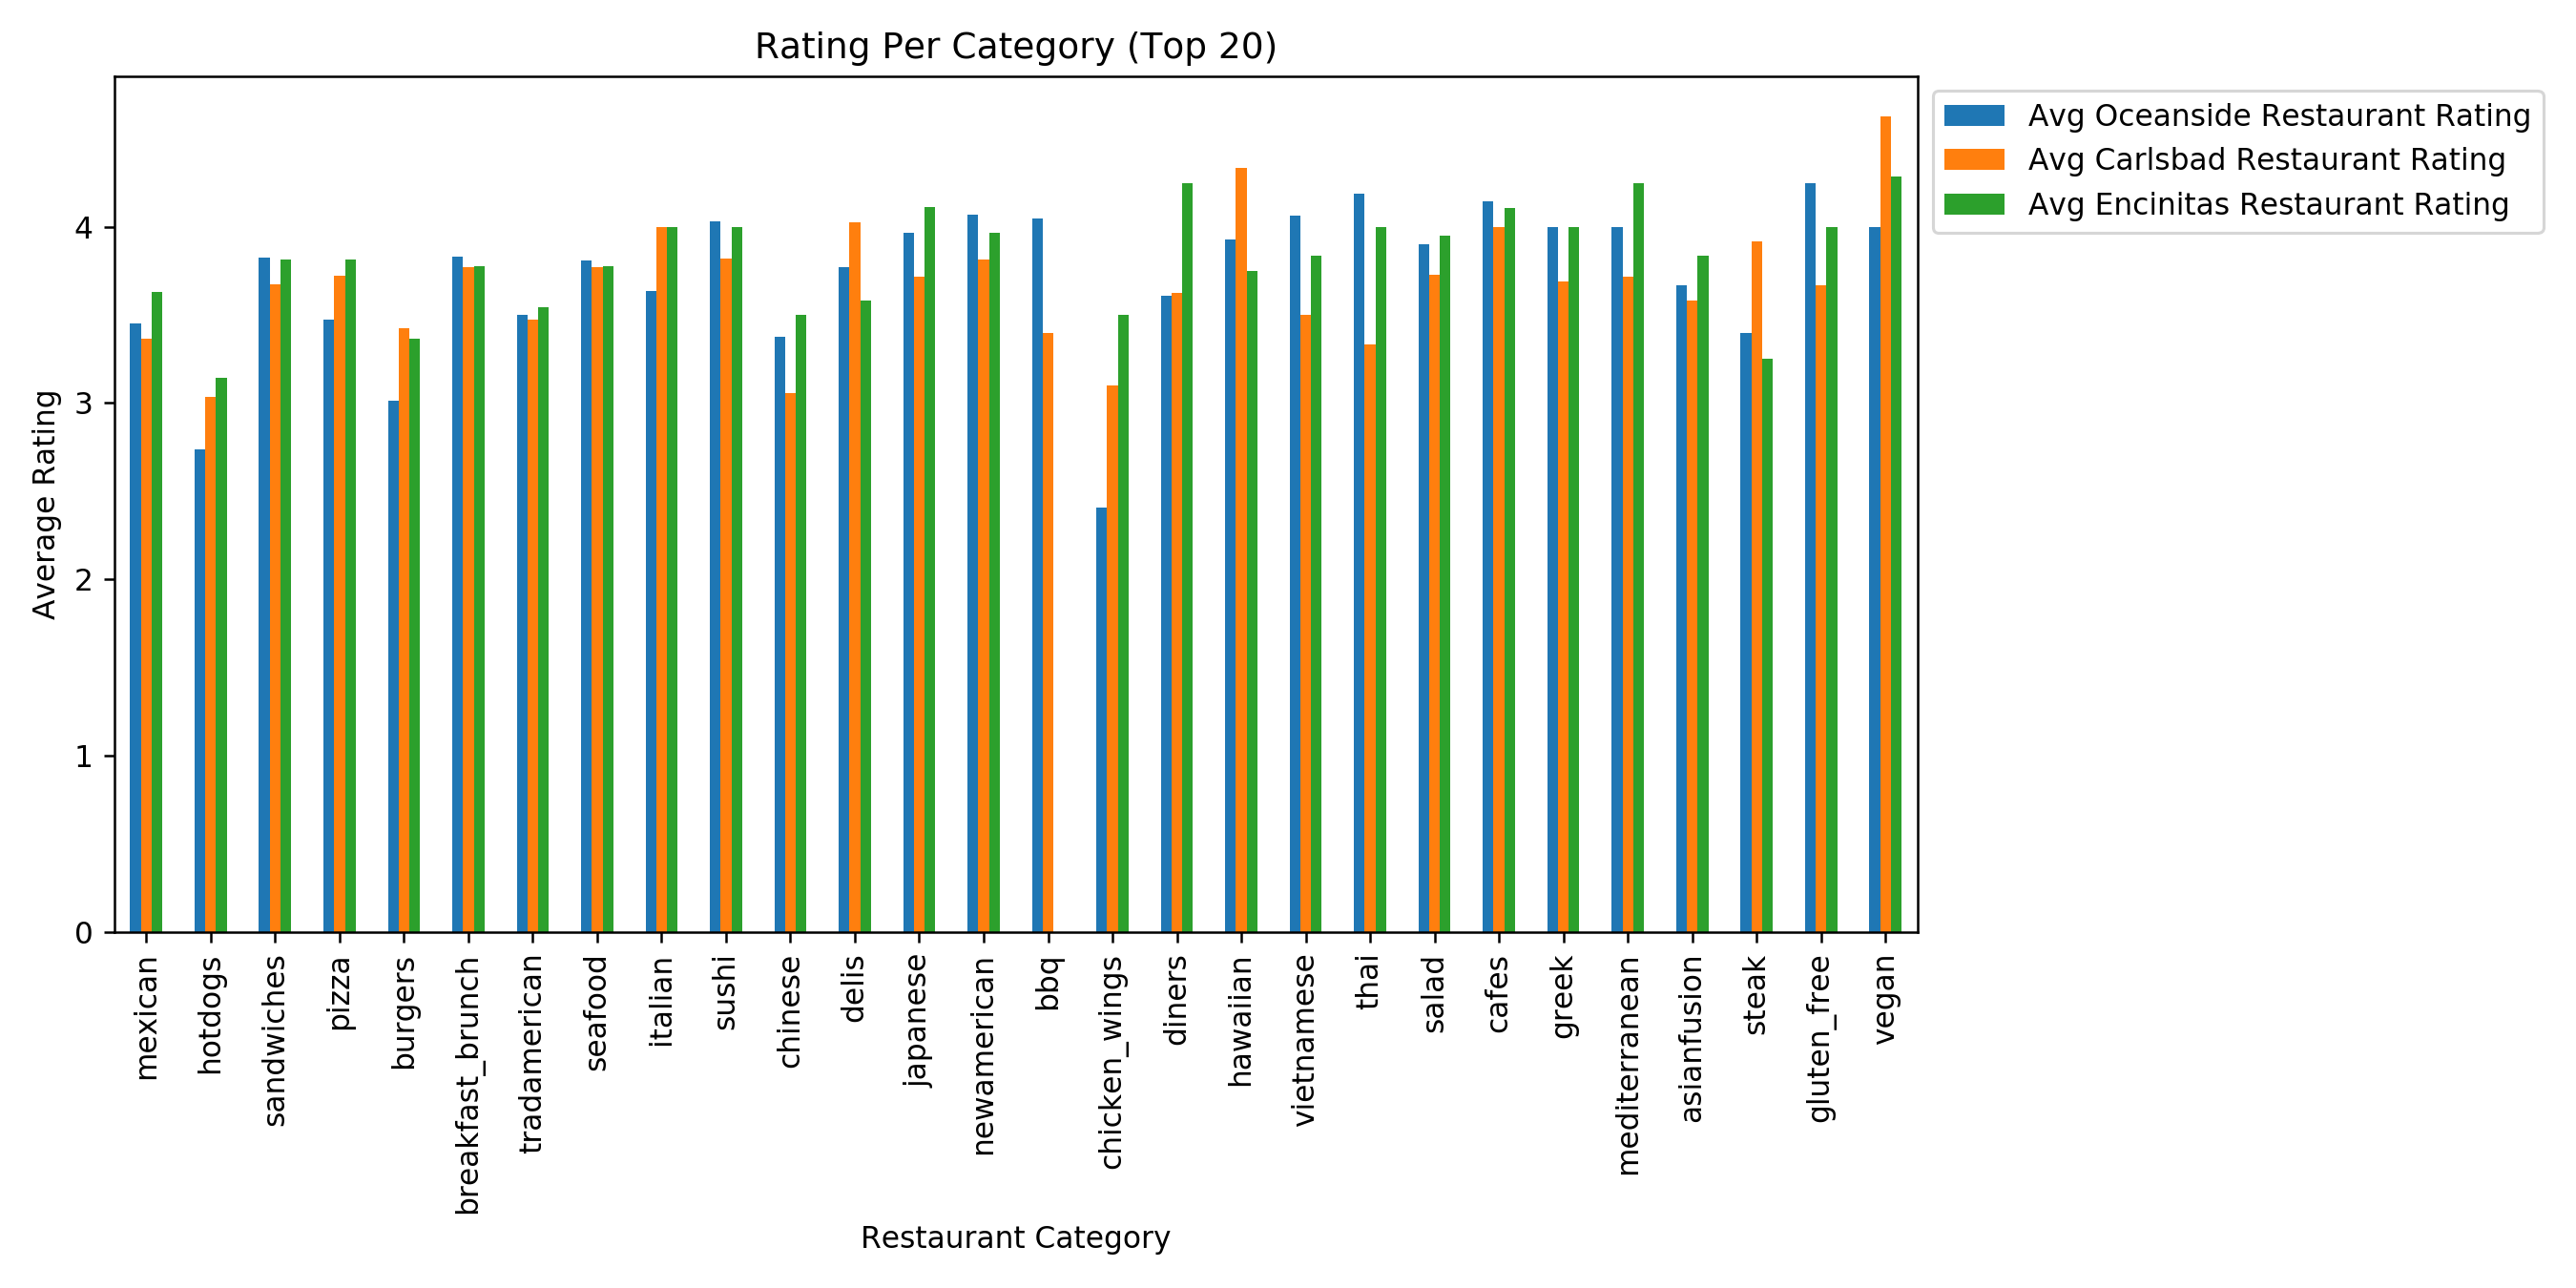

In [148]:
oce_rating_top20_count.plot(kind="bar", figsize=(12,6)).legend(bbox_to_anchor=(1,1))
plt.title("Rating Per Category (Top 20)")
plt.ylabel("Average Rating")
plt.xlabel("Restaurant Category")
plt.savefig('new_oce_top20_rating.png')
plt.tight_layout()


In [84]:
O_top20_rating = oceanside_restaurant_rating.sort_values('Rating',ascending=False)
O_top20_rating.head(20)
O_top20_rating = O_top20_rating.iloc[:20]
O_top20_rating.head()

Rating
Category               
creperies           5.0
polynesian          4.5
indonesian          4.5
caribbean           4.5
tapasmallplates     4.5

<IPython.core.display.Javascript object>


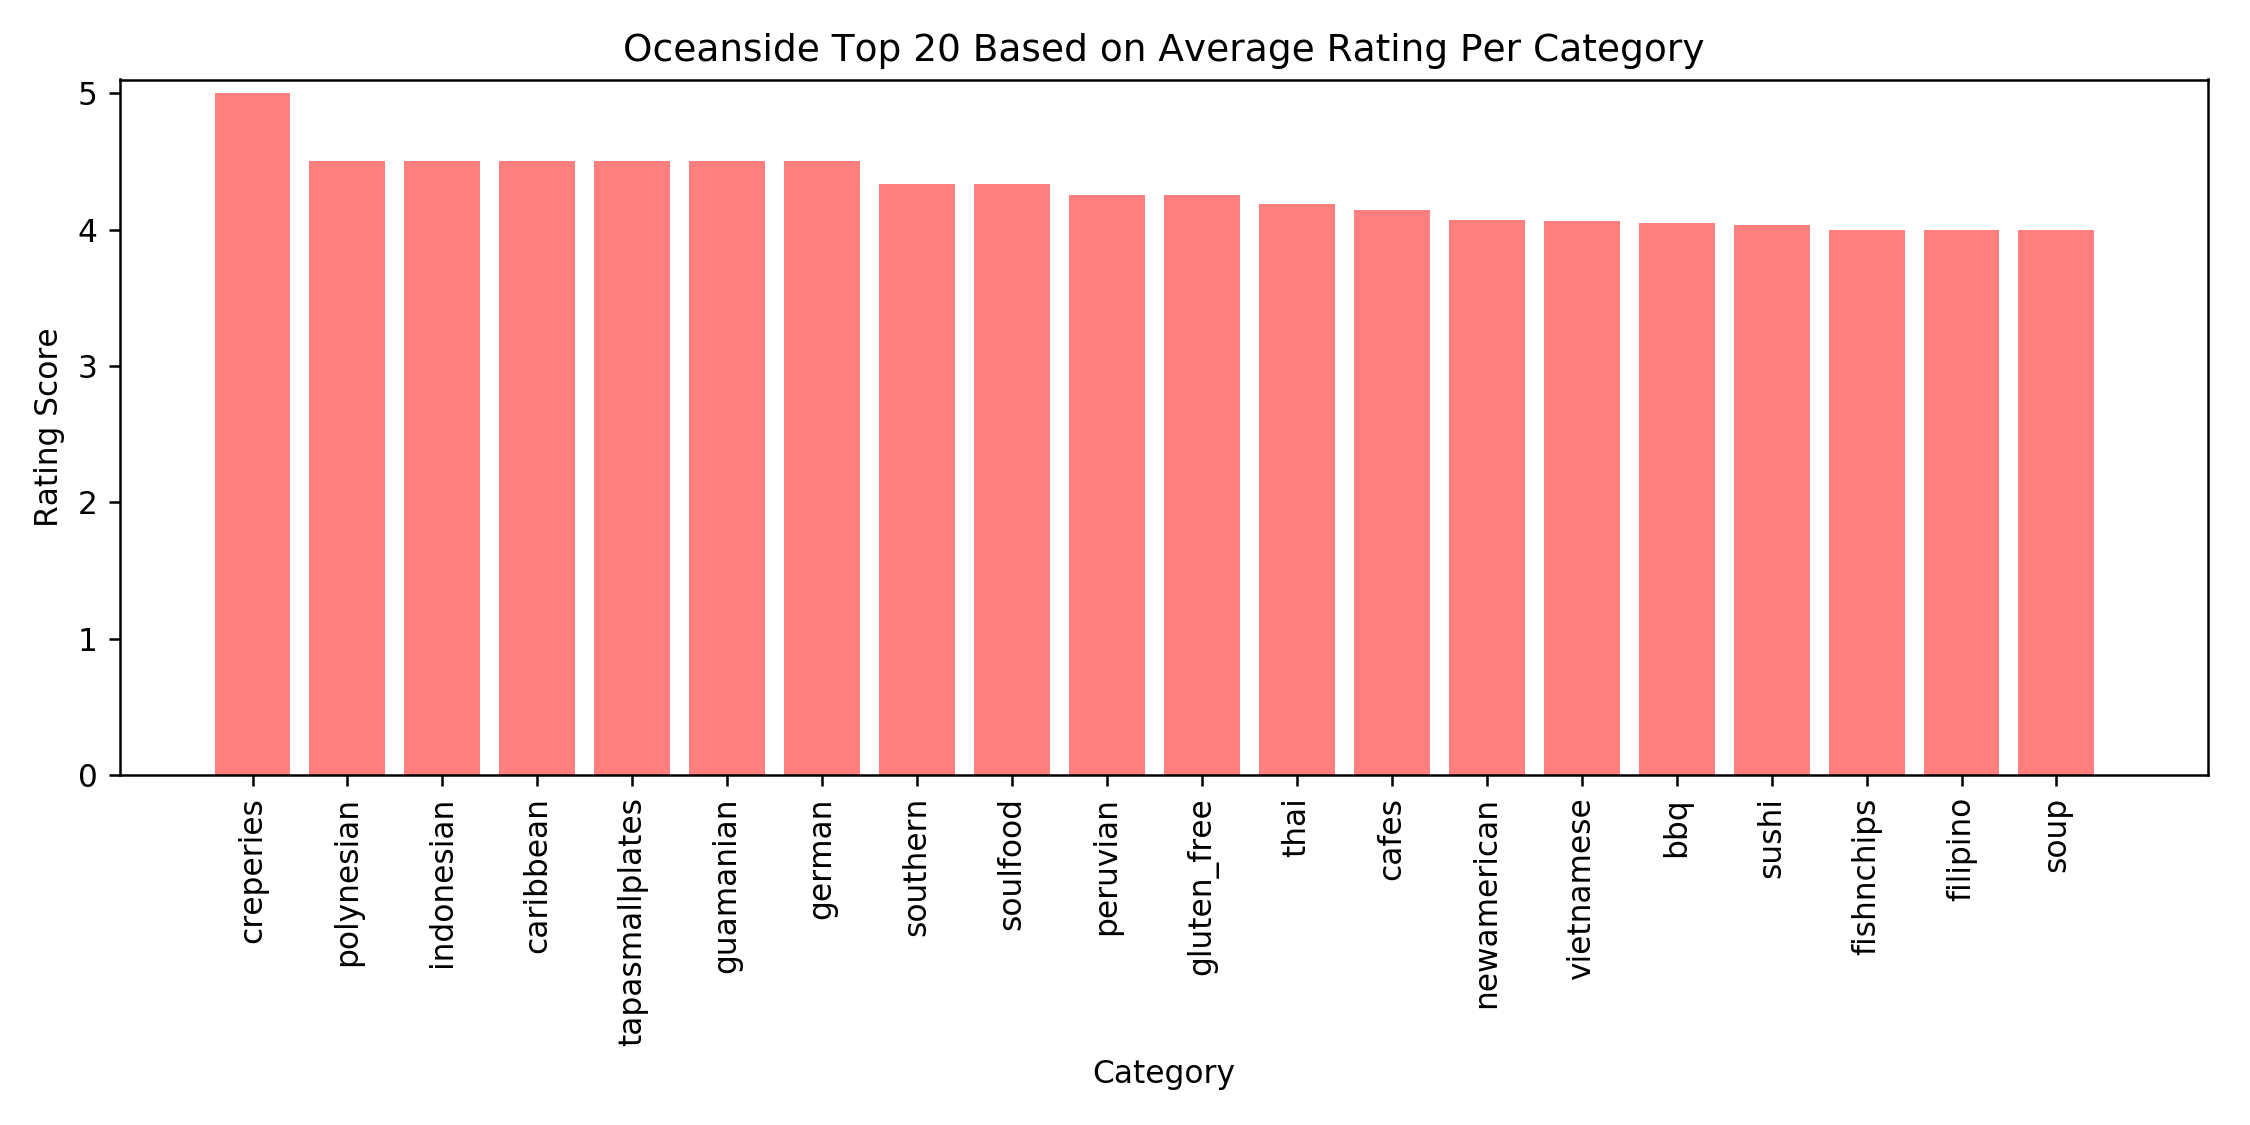

In [85]:
O_restaurant_top20_rating_mean = O_top20_rating.reset_index()
x_axis = np.arange(len(O_restaurant_top20_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, O_restaurant_top20_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, O_restaurant_top20_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(O_restaurant_top20_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Oceanside Top 20 Based on Average Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('Oceanside_top20_avg_rating.png')
plt.show()

In [86]:
C_top20_rating = carlsbad_restaurant_rating_df.sort_values('Rating',ascending=False)
#C_top20_rating.head()
C_top20_rating = C_top20_rating.iloc[:20]
C_top20_rating.head()

Rating
Category          
raw_food     5.000
vegan        4.625
wraps        4.500
foodstands   4.500
himalayan    4.500

<IPython.core.display.Javascript object>


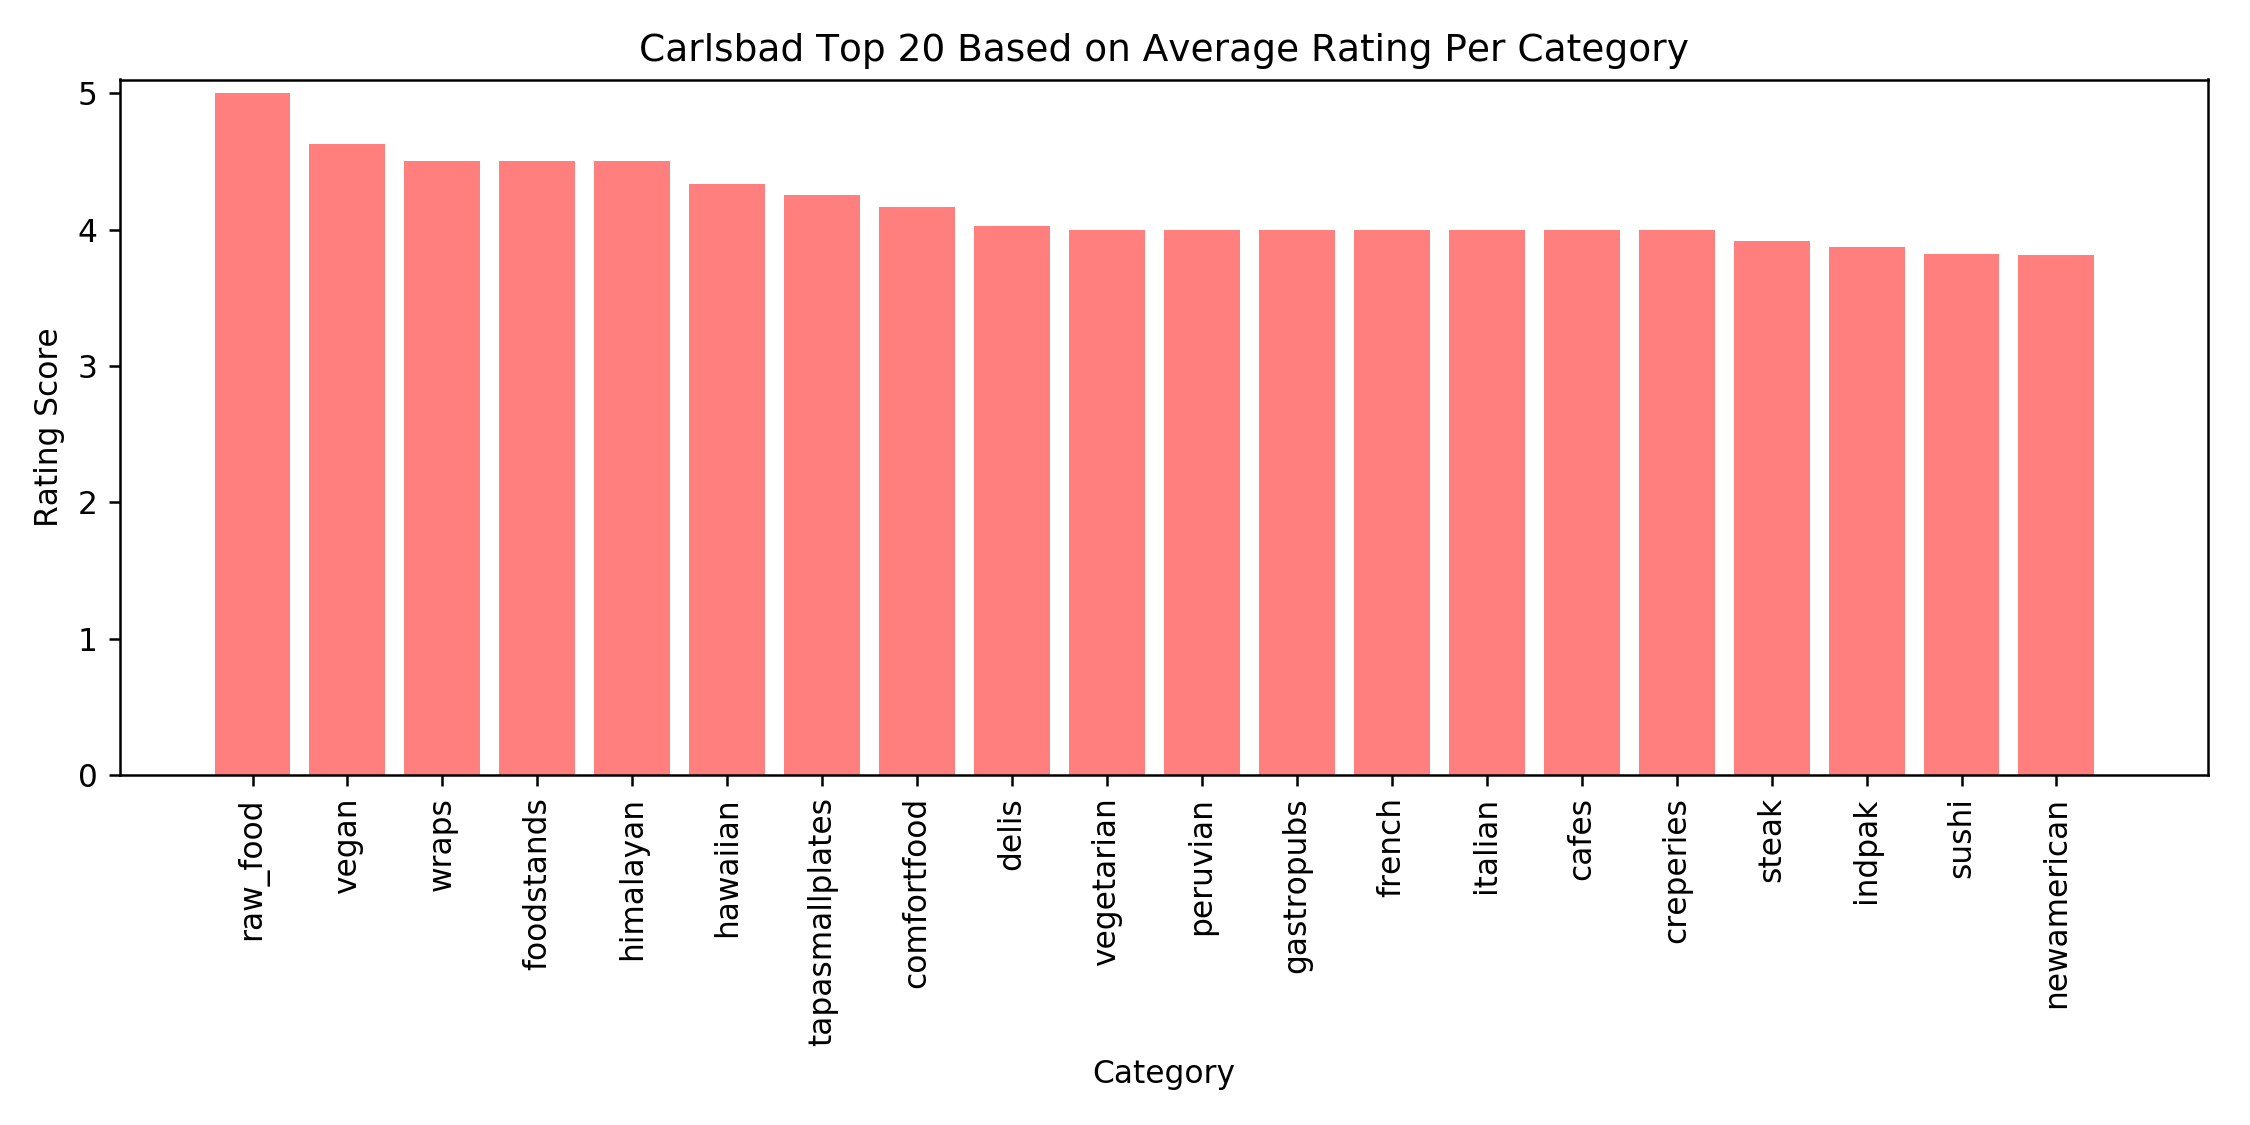

In [87]:
C_restaurant_top20_rating_mean = C_top20_rating.reset_index()
x_axis = np.arange(len(C_restaurant_top20_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, C_restaurant_top20_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, C_restaurant_top20_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(C_restaurant_top20_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Carlsbad Top 20 Based on Average Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('Carlsbad_top20_avg_rating.png')
plt.show()

In [88]:
E_sorted_avg_rating = encinitas_restaurant_rating_df.sort_values('Rating',ascending=False)
#C_top20_rating.head()
E_top20_avgrating = E_sorted_avg_rating.iloc[:20]
E_top20_avgrating.head()

Rating
Category          
waffles        4.5
scottish       4.5
persian        4.5
foodstands     4.5
filipino       4.5

<IPython.core.display.Javascript object>


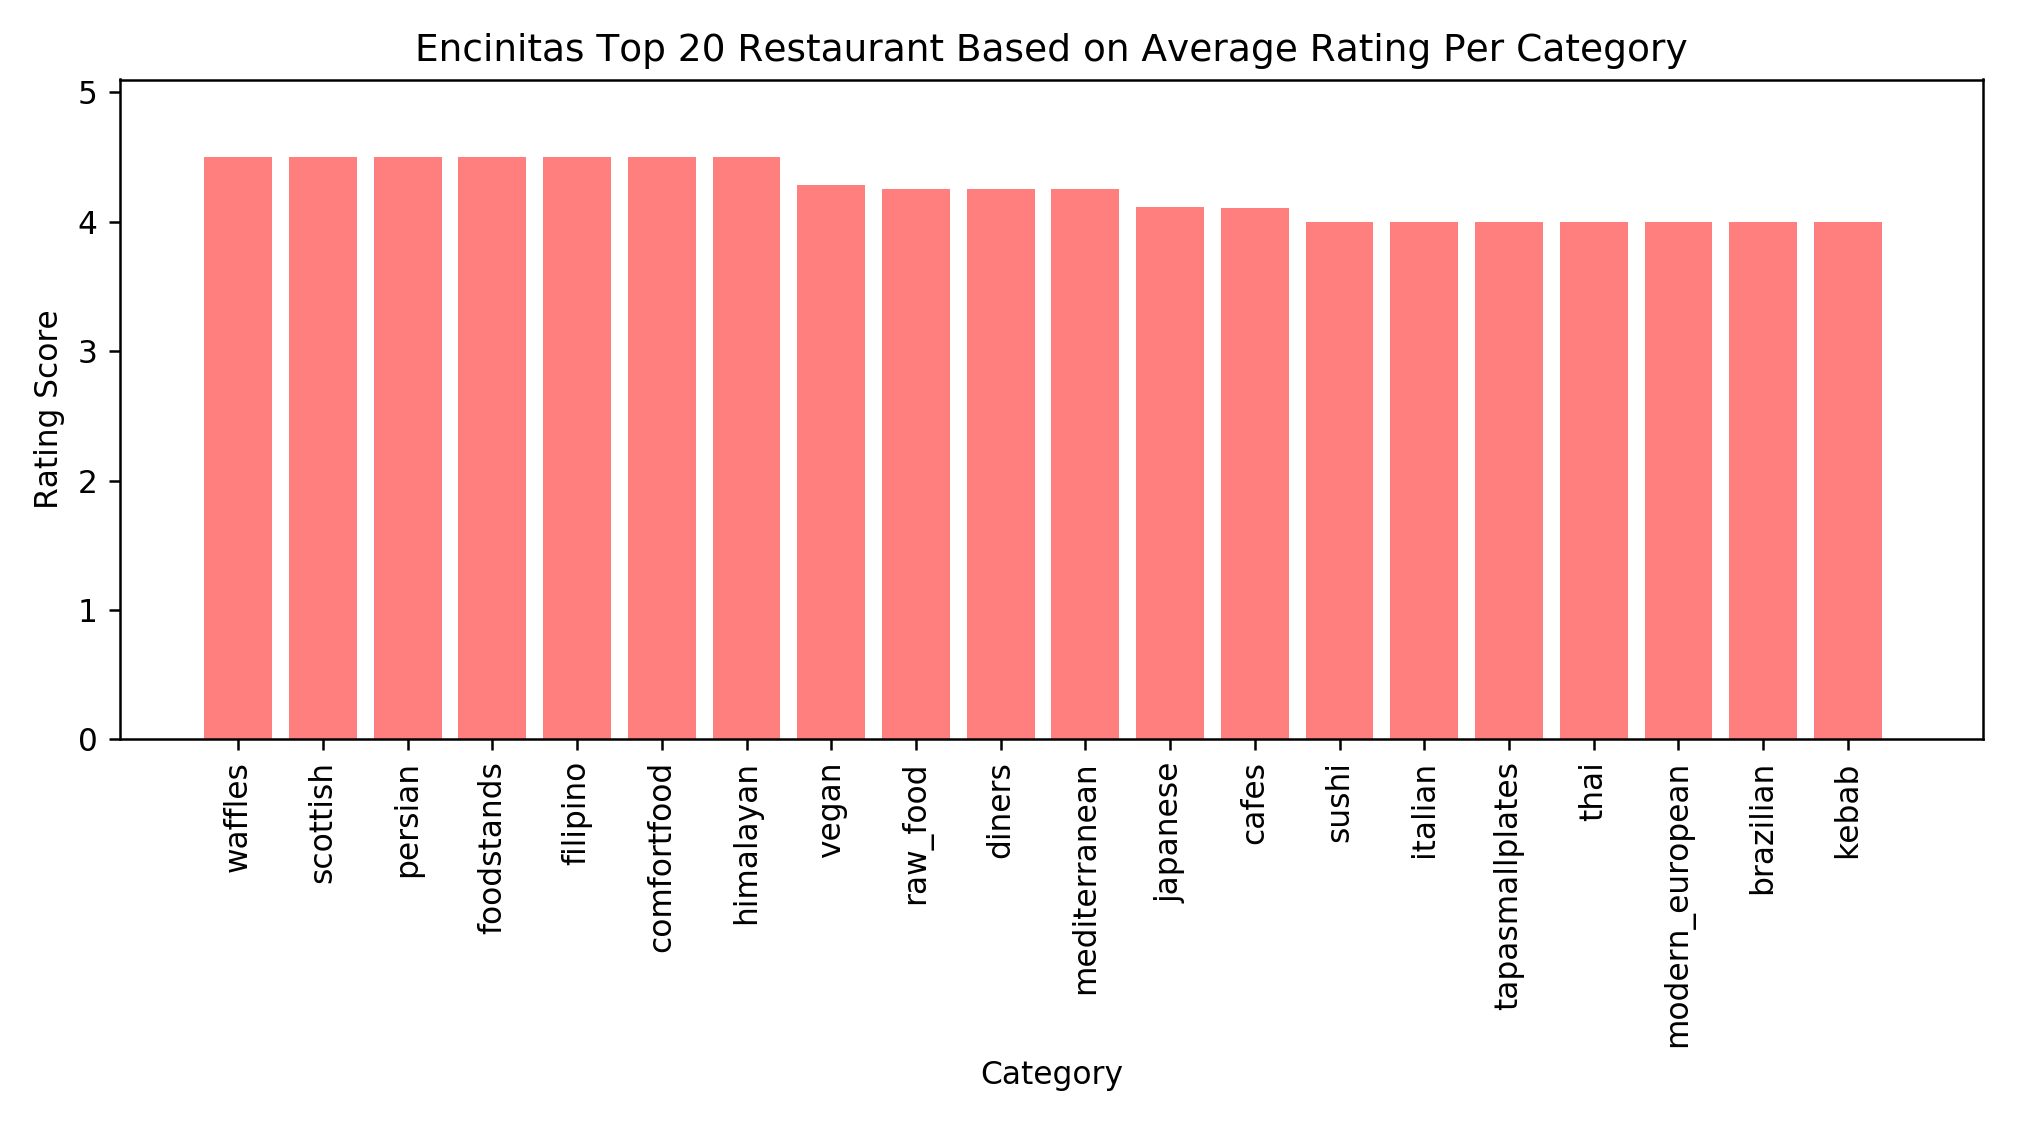

In [89]:
E_restaurant_top20_rating_mean = E_top20_avgrating.reset_index()
x_axis = np.arange(len(E_restaurant_top20_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(9,5))
plt.bar(x_axis, E_restaurant_top20_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, E_restaurant_top20_rating_mean['Category'], rotation='vertical')
plt.xlim(-1, len(E_restaurant_top20_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Encinitas Top 20 Restaurant Based on Average Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('Encinitas_top20_avg_rating.png')
plt.show()

In [90]:
OC_top20_rating = pd.merge(O_top20_rating,C_top20_rating, on="Category", how="outer")
OC_Top20_Rating = OC_top20_rating.rename(columns={"Rating_x": "Oceanside Avg Rating", "Rating_y": "Carlsbad Avg Rating"})
#OC_Top20_Rating

In [91]:
#side_by-side avg rating comparison 
OCE_top20_rating = pd.merge(OC_Top20_Rating,E_top20_avgrating, on="Category", how="outer")
OCE_Top20_Rating = OCE_top20_rating.rename(columns={"Rating": "Encinitas Avg Rating"})
OCE_Top20_Rating.head()

Oceanside Avg Rating  Carlsbad Avg Rating  \
Category                                                     
creperies                         5.0                 4.00   
polynesian                        4.5                  NaN   
indonesian                        4.5                  NaN   
caribbean                         4.5                  NaN   
tapasmallplates                   4.5                 4.25   

                 Encinitas Avg Rating  
Category                               
creperies                         NaN  
polynesian                        NaN  
indonesian                        NaN  
caribbean                         NaN  
tapasmallplates                   4.0

In [127]:
#OCE_restaurant_top20_rating_mean = OCE_Top20_Rating.reset_index()
#OCE_restaurant_top20_rating_mean.plot(kind="bar", figsize=(15,5)).legend(bbox_to_anchor=(1, 1))                                                                  
#x_axis = np.arange(len(OCE_restaurant_top20_rating_mean['Category']))
#tick_locations = [value+0.0 for value in x_axis]
#plt.title("Average Restaurant Rating Per Category (Top 20)")
#plt.xlabel("Category")
#plt.ylabel("Rating")
#plt.xticks(tick_locations, OCE_restaurant_top20_rating_mean['Category'], rotation="vertical")
#plt.xlim(-.5, len(OCE_restaurant_top20_rating_mean) +1)
#plt.ylim(0, 5.1)
#plt.tight_layout()
#plt.show()

In [93]:
#Review Count

In [94]:
#Restaurant Review Count Per Category- Oceanside
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_review_count = oceanside_df.groupby("Category")['Review Count'].agg('sum')
oceanside_restaurant_review_count_df = pd.DataFrame(oceanside_restaurant_review_count)
oceanside_restaurant_review_count_df.head()

Review Count
Category                      
afghani                      1
asianfusion               2306
bbq                       5633
breakfast_brunch         11940
buffets                    302

<IPython.core.display.Javascript object>


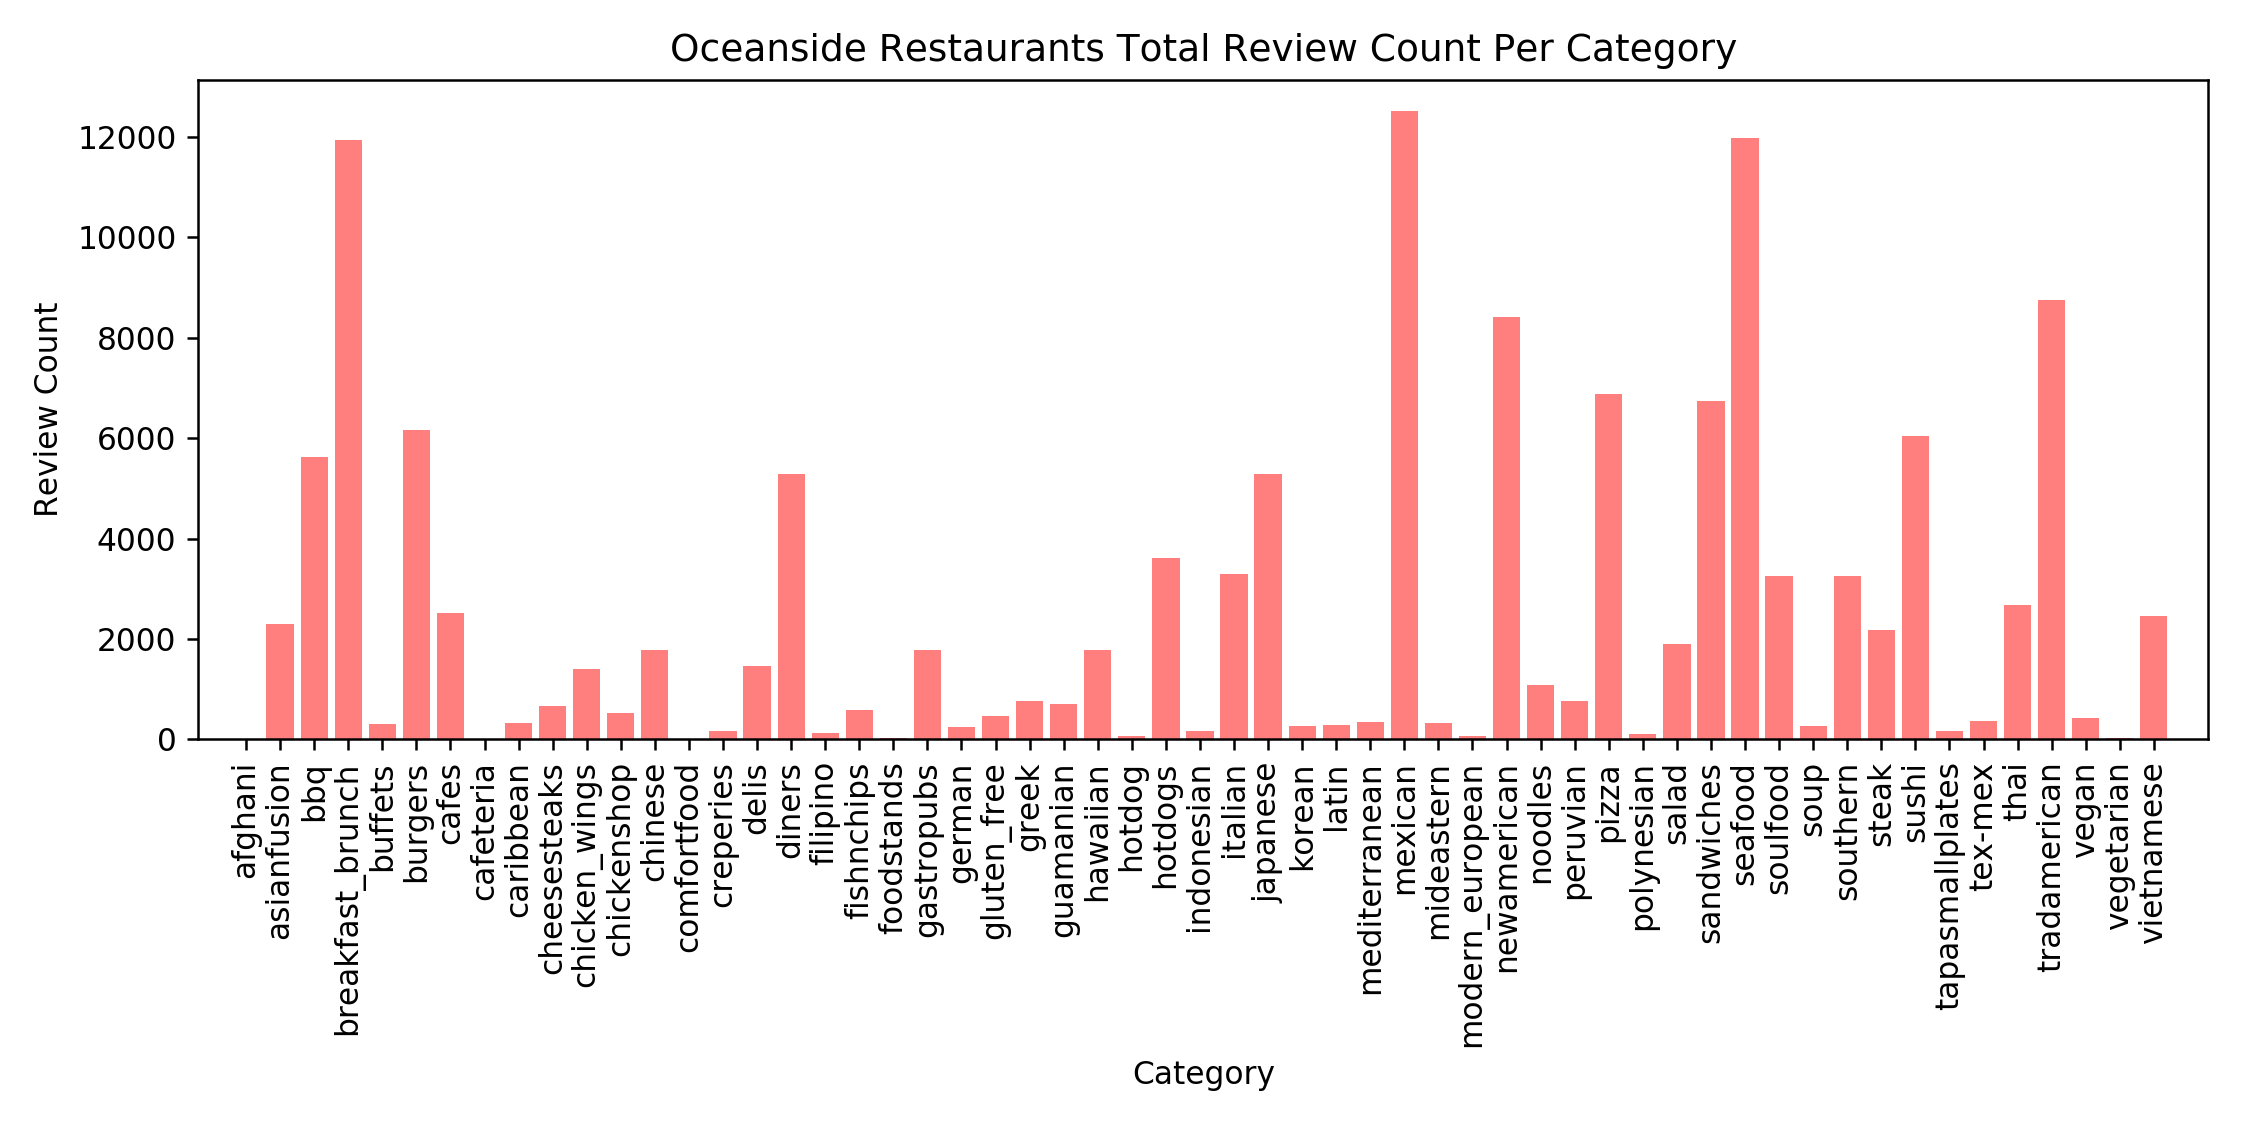

In [95]:
O_restaurant_review_count = oceanside_restaurant_review_count_df.reset_index()
x_axis = np.arange(len(O_restaurant_review_count['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, O_restaurant_review_count["Review Count"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, O_restaurant_review_count['Category'], rotation="vertical")
plt.xlim(-1, len(O_restaurant_review_count) +1)
plt.title("Oceanside Restaurants Total Review Count Per Category")
plt.xlabel("Category")
plt.ylabel("Review Count")
plt.tight_layout()
plt.savefig('oceanside_review_count.png')
plt.show()

In [96]:
#Restaurant Review Count Per Category- Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_review_count = carlsbad_df.groupby("Category")['Review Count'].agg('sum')
carlsbad_restaurant_review_count_df = pd.DataFrame(carlsbad_restaurant_review_count)
carlsbad_restaurant_review_count_df.head()

Review Count
Category                      
asianfusion               1777
bbq                       1174
breakfast_brunch          8827
buffets                    906
burgers                   6319

<IPython.core.display.Javascript object>


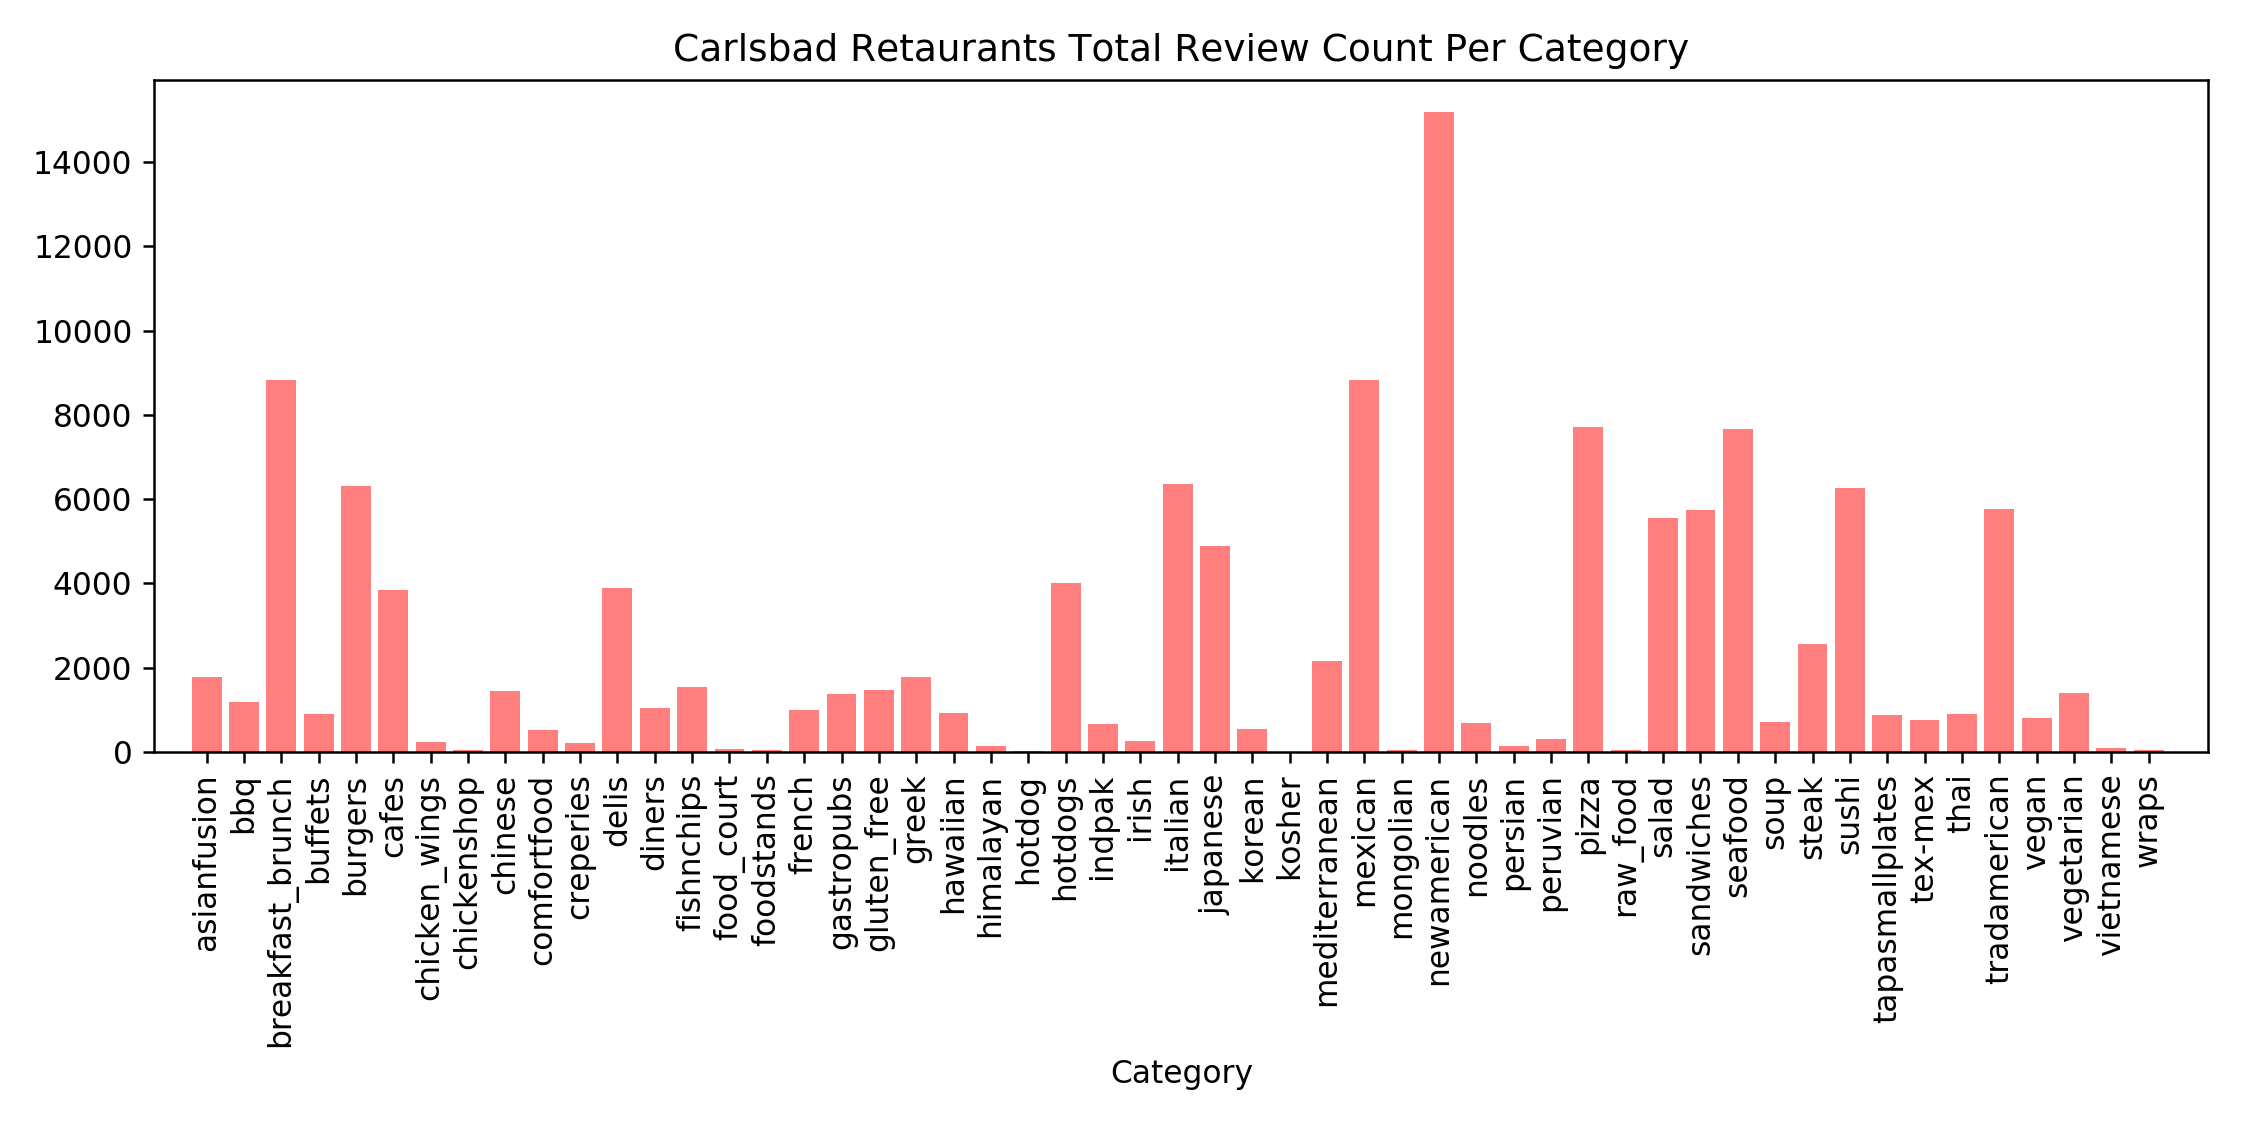

In [97]:
C_restaurant_review_count = carlsbad_restaurant_review_count_df.reset_index()
x_axis = np.arange(len(C_restaurant_review_count['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, C_restaurant_review_count["Review Count"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, C_restaurant_review_count['Category'], rotation="vertical")
plt.xlim(-1, len(C_restaurant_review_count) +1)
plt.title("Carlsbad Retaurants Total Review Count Per Category")
plt.xlabel("Category")
plt.tight_layout()
plt.savefig('carlsbad_review_count.png')
plt.show()

In [98]:
#Restaurant Review Count Per Category- Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_review_count = encinitas_df.groupby("Category")['Review Count'].agg('sum')
encinitas_restaurant_review_count_df = pd.DataFrame(encinitas_restaurant_review_count)
#encinitas_restaurant_review_count_df.head()

<IPython.core.display.Javascript object>


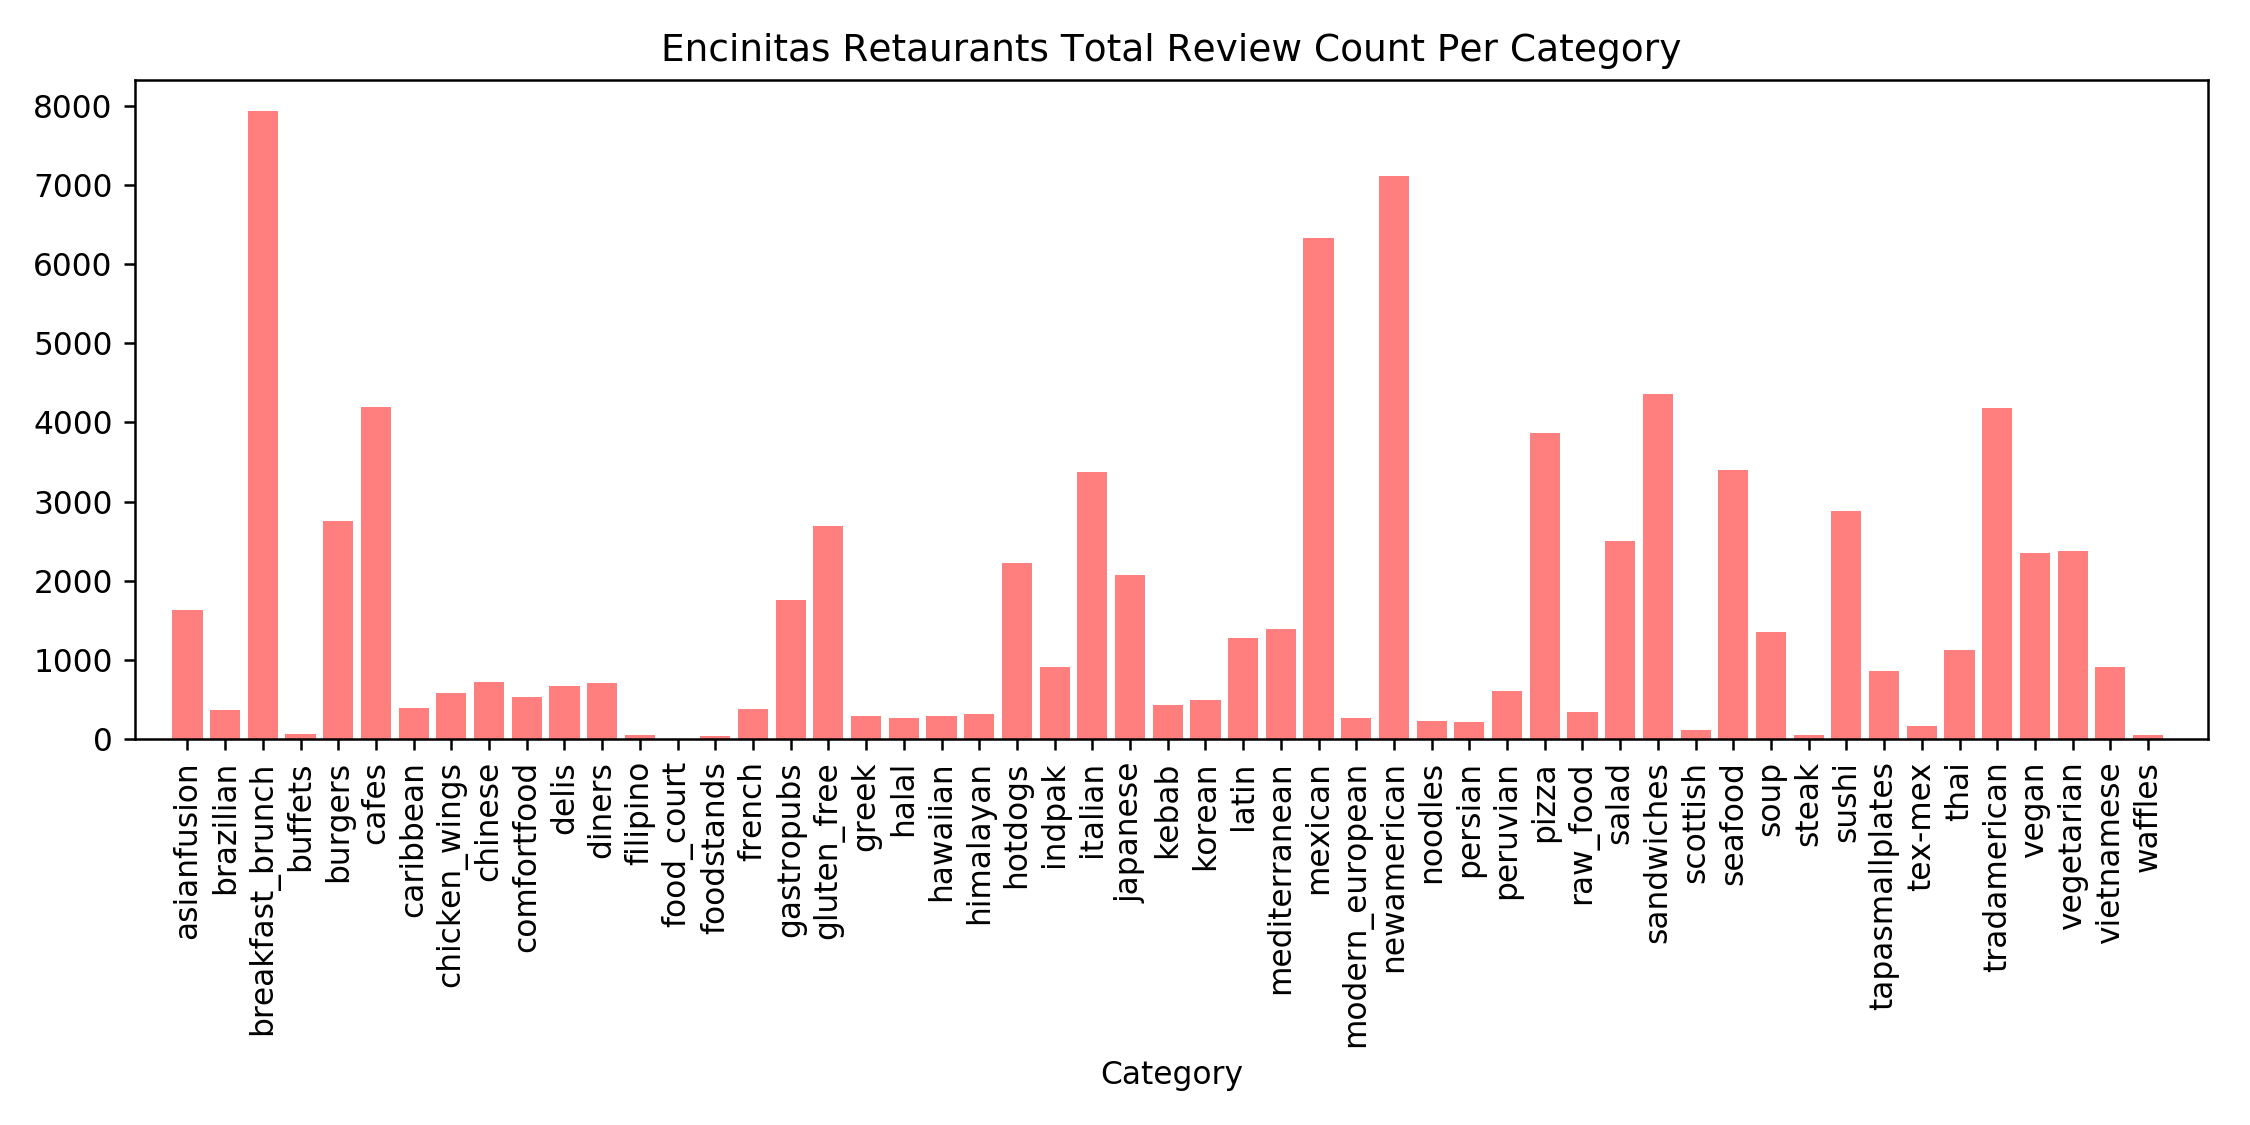

In [99]:
E_restaurant_review_count = encinitas_restaurant_review_count_df.reset_index()
x_axis = np.arange(len(E_restaurant_review_count['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, E_restaurant_review_count["Review Count"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, E_restaurant_review_count['Category'], rotation="vertical")
plt.xlim(-1, len(C_restaurant_review_count) +1)
plt.title("Encinitas Retaurants Total Review Count Per Category")
plt.xlabel("Category")
plt.tight_layout()
plt.savefig('encinitas_review_count.png')
plt.show()

In [100]:
OC_review_count = pd.merge(oceanside_restaurant_review_count_df,carlsbad_restaurant_review_count_df, on="Category", how="outer")
OC_review_count.head()
OC_review_count_df = OC_review_count.rename(columns={"Review Count_x": "Oceanside Review Count",
                                 "Review Count_y": "Carlsbad Review Count"})
#OC_review_count_df.head()

In [141]:
OCE_review_count = pd.merge(OC_review_count_df,encinitas_restaurant_review_count_df, on="Category", how="outer")
OCE_review_count_df = OCE_review_count.rename(columns={"Review Count": "Encinitas Review Count"})
OCE_review_count_df.head()

Oceanside Review Count  Carlsbad Review Count  \
Category                                                          
afghani                              1.0                    NaN   
asianfusion                       2306.0                 1777.0   
bbq                               5633.0                 1174.0   
breakfast_brunch                 11940.0                 8827.0   
buffets                            302.0                  906.0   

                  Encinitas Review Count  
Category                                  
afghani                              NaN  
asianfusion                       1635.0  
bbq                                  NaN  
breakfast_brunch                  7932.0  
buffets                             67.0

In [145]:
#Top 20 (Review Count)
oce_review_top20_count = OCE_review_count_df.loc[['mexican','hotdogs','sandwiches','pizza','burgers','breakfast_brunch',
                                                    'tradamerican','seafood','italian','sushi','chinese','delis','japanese',
                                                    'newamerican','bbq','chicken_wings','diners','hawaiian','vietnamese','thai',
                                                    'salad','cafes','greek','mediterranean','asianfusion','steak','gluten_free',
                                                    'vegan'],
                                                   ['Oceanside Review Count','Carlsbad Review Count',
                                                    'Encinitas Review Count']]
    
oce_review_top20_count.head()

Oceanside Review Count  Carlsbad Review Count  \
Category                                                    
mexican                    12518.0                 8816.0   
hotdogs                     3608.0                 4007.0   
sandwiches                  6730.0                 5749.0   
pizza                       6888.0                 7723.0   
burgers                     6155.0                 6319.0   

            Encinitas Review Count  
Category                            
mexican                     6327.0  
hotdogs                     2223.0  
sandwiches                  4356.0  
pizza                       3872.0  
burgers                     2762.0

<IPython.core.display.Javascript object>


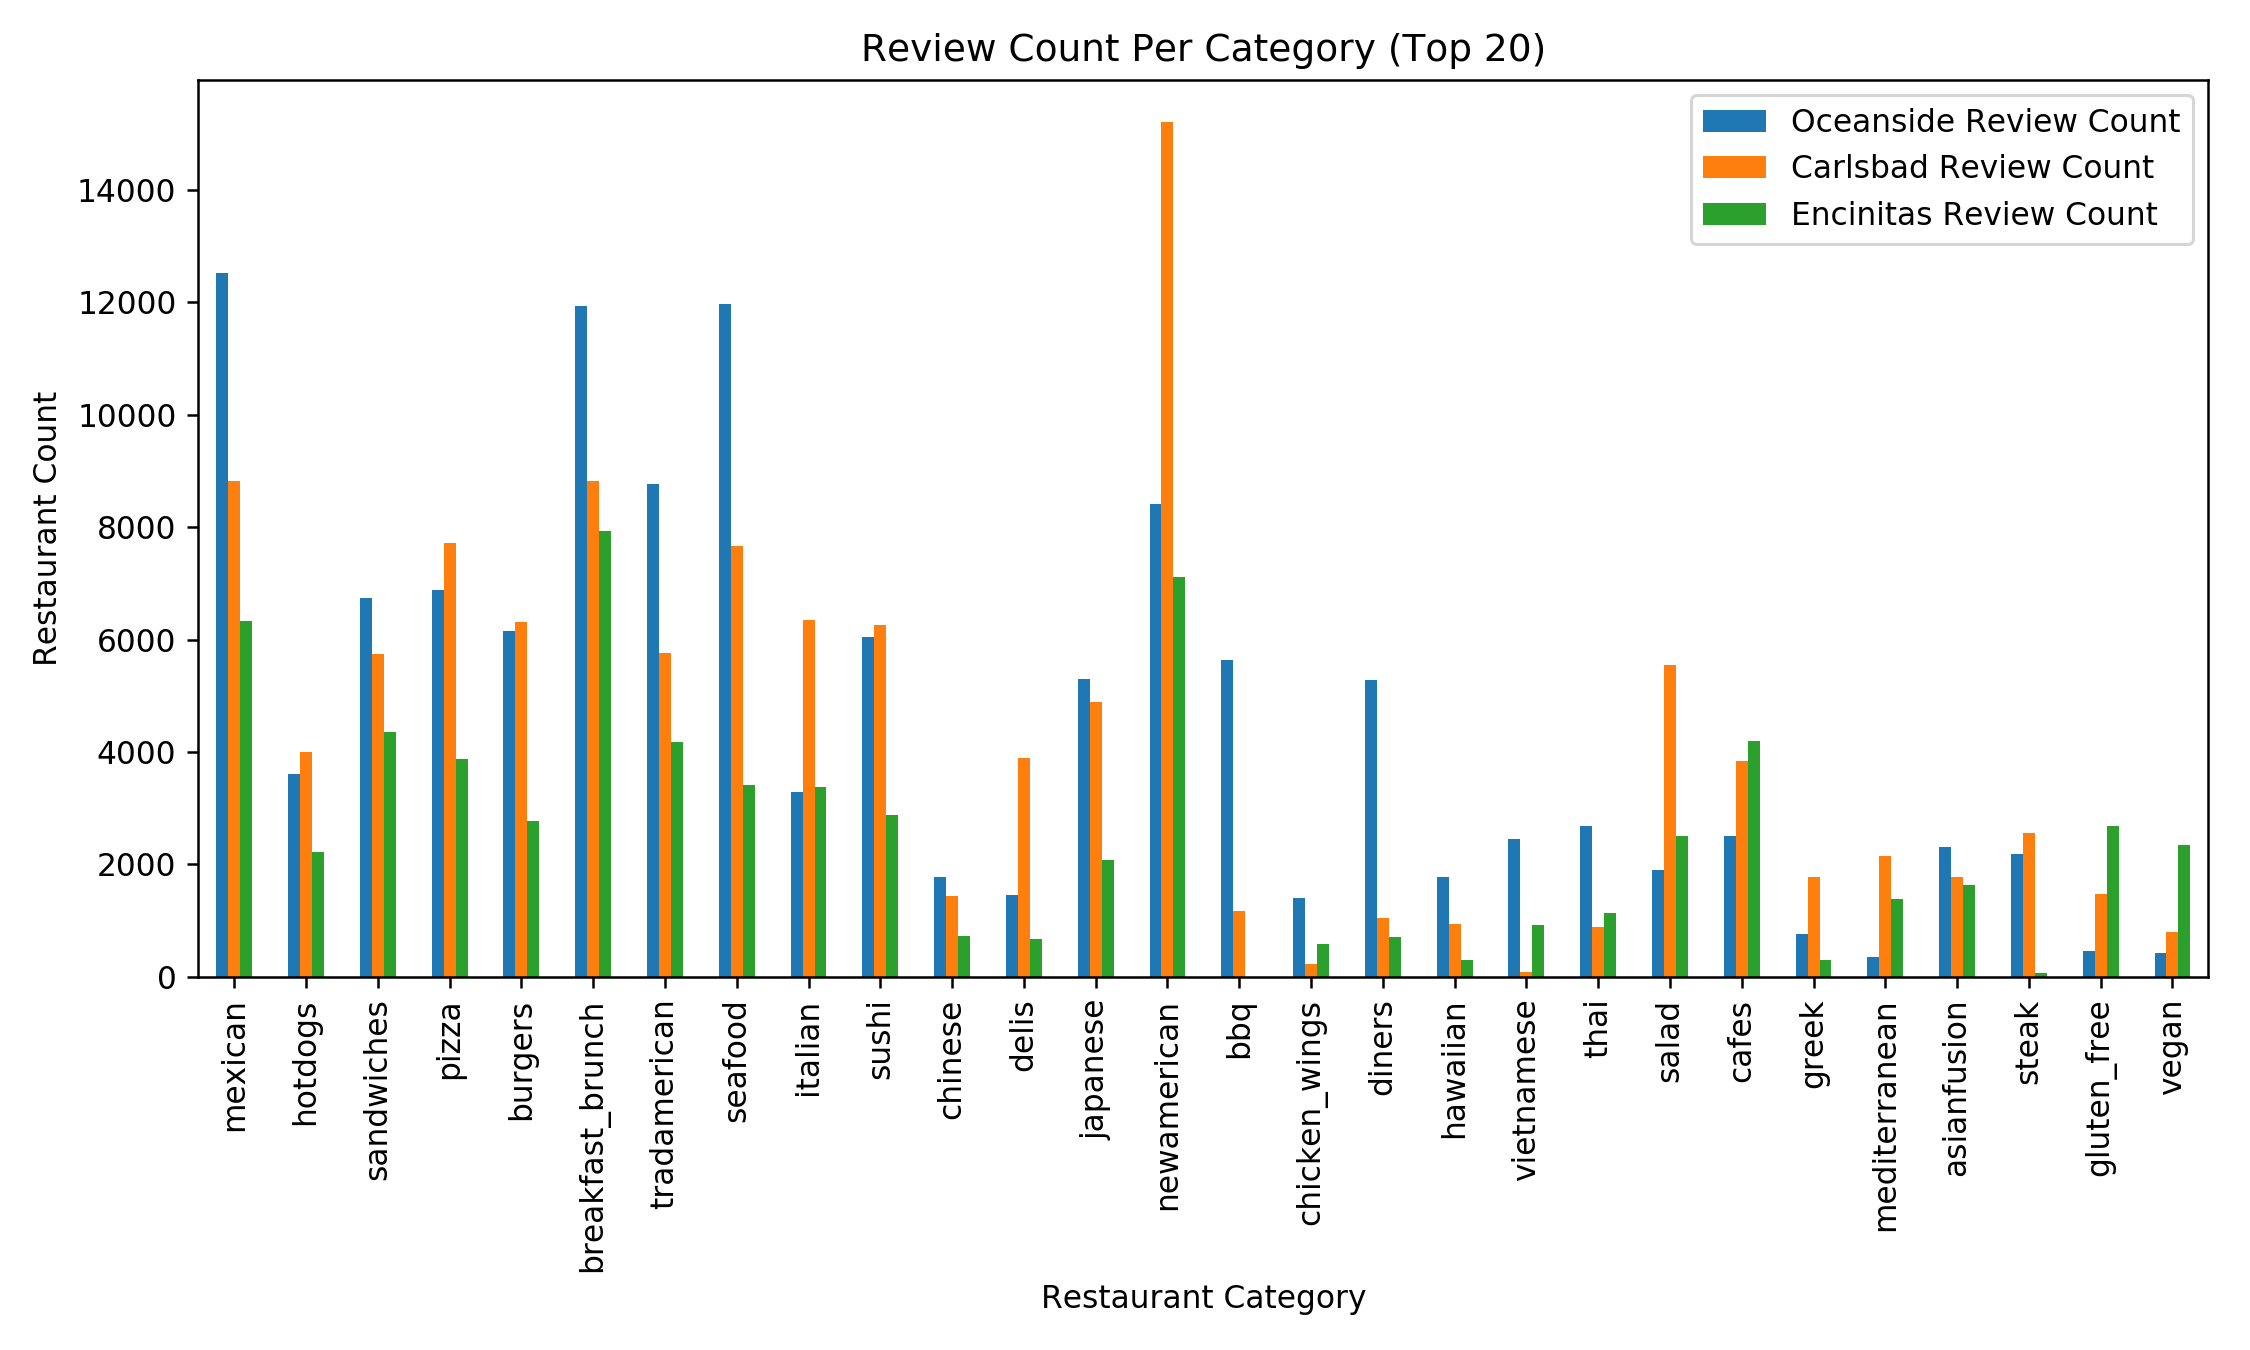

In [147]:
oce_review_top20_count.plot(kind="bar", figsize=(10,6)).legend(bbox_to_anchor=(1,1))
plt.title("Review Count Per Category (Top 20)")
plt.ylabel("Restaurant Count")
plt.savefig('new_oce_review_count_top20.png')
plt.xlabel("Restaurant Category")
plt.tight_layout()

In [102]:
O_top20_review_count = oceanside_restaurant_review_count_df.sort_values('Review Count',ascending=False)
#O_top20_review_count.head(20)
O_top20_reviewcount = O_top20_review_count.iloc[:20]
O_top20_reviewcount.head()

Review Count
Category                      
mexican                  12518
seafood                  11975
breakfast_brunch         11940
tradamerican              8760
newamerican               8418

In [103]:
C_top20_review_count = carlsbad_restaurant_review_count_df.sort_values('Review Count',ascending=False)
#C_top20_review_count.head(20)
C_top20_reviewcount = C_top20_review_count.iloc[:20]
C_top20_reviewcount.head()

Review Count
Category                      
newamerican              15204
breakfast_brunch          8827
mexican                   8816
pizza                     7723
seafood                   7664

In [104]:
E_top20_review_count = encinitas_restaurant_review_count_df.sort_values('Review Count',ascending=False)
E_top20_review_count.head(20)
E_top20_reviewcount = E_top20_review_count.iloc[:20]
E_top20_reviewcount.head()

Review Count
Category                      
breakfast_brunch          7932
newamerican               7105
mexican                   6327
sandwiches                4356
cafes                     4201

In [105]:
OC_top20_review_count = pd.merge(O_top20_reviewcount,C_top20_reviewcount, on="Category", how="outer")
OC_top20_rev_count = OC_top20_review_count.rename(columns={"Review Count_x":"Oceanside Review Count","Review Count_y":"Carlsbad Review Count"})
OCE_top20_rev_count = pd.merge(OC_top20_rev_count, E_top20_reviewcount, on="Category", how="outer")
OCE_top20_review_count = OCE_top20_rev_count.rename(columns={"Review Count": "Encinitas Review Count"})
OCE_top20_review_count.head()

Oceanside Review Count  Carlsbad Review Count  \
Category                                                          
mexican                          12518.0                 8816.0   
seafood                          11975.0                 7664.0   
breakfast_brunch                 11940.0                 8827.0   
tradamerican                      8760.0                 5767.0   
newamerican                       8418.0                15204.0   

                  Encinitas Review Count  
Category                                  
mexican                           6327.0  
seafood                           3405.0  
breakfast_brunch                  7932.0  
tradamerican                      4185.0  
newamerican                       7105.0

In [106]:
#OCE_top20_review_count.plot(kind="bar", figsize=(10,6))
#plt.title("Review Count Per Category (Top 20)")
#plt.ylabel("Total Review Count")
#plt.savefig('OCE_top20_review_count.png')
#plt.xlabel("Restaurant Category")
#plt.tight_layout()


In [107]:
#Price 

In [108]:
#Restaurant Price Per Category- Carlsbad
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_price = oceanside_df.groupby("Category")['Price'].agg('mean')
oceanside_restaurant_price_df = pd.DataFrame(oceanside_restaurant_price)
oceanside_restaurant_price_df.head()

Price
Category                  
afghani           1.000000
asianfusion       1.833333
bbq               1.285714
breakfast_brunch  1.393939
buffets           2.000000

In [109]:
#Restaurant Price Per Category- Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_price = carlsbad_df.groupby("Category")['Price'].agg('mean')
carlsbad_restaurant_price_df = pd.DataFrame(carlsbad_restaurant_price)
carlsbad_restaurant_price_df.head()

Price
Category                  
asianfusion       1.428571
bbq               1.800000
breakfast_brunch  1.500000
buffets           2.000000
burgers           1.636364

In [110]:
#Restaurant Price Per Category- Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_price = encinitas_df.groupby("Category")['Price'].agg('mean')
encinitas_restaurant_price_df = pd.DataFrame(encinitas_restaurant_price)
encinitas_restaurant_price_df.head()

Price
Category                  
asianfusion       1.428571
brazilian         2.000000
breakfast_brunch  1.600000
buffets           2.000000
burgers           1.200000

In [111]:
#Price merge Oceanside and Carlsbad
OC_price_mean = pd.merge(oceanside_restaurant_price_df,carlsbad_restaurant_price_df, on="Category", how="outer")
OC_price_mean.head()
OC_price_mean_df = OC_price_mean.rename(columns={"Price_x": "Oceanside Mean Price",
                                 "Price_y": "Carlsbad Mean Price"})
#OC_price_mean_df.head()

In [131]:
#Price merge Oceanside, Carlsbad, Encinitas
OCE_price_mean = pd.merge(OC_price_mean_df,encinitas_restaurant_price_df, on="Category", how="outer")
OCE_price_mean_df = OCE_price_mean.rename(columns={"Price": "Encinitas Mean Price"})
OCE_price_mean_df.head()

Oceanside Mean Price  Carlsbad Mean Price  \
Category                                                      
afghani                       1.000000                  NaN   
asianfusion                   1.833333             1.428571   
bbq                           1.285714             1.800000   
breakfast_brunch              1.393939             1.500000   
buffets                       2.000000             2.000000   

                  Encinitas Mean Price  
Category                                
afghani                            NaN  
asianfusion                   1.428571  
bbq                                NaN  
breakfast_brunch              1.600000  
buffets                       2.000000

In [132]:
#Top 20 (Price)
oce_price_top20_count = OCE_price_mean_df.loc[['mexican','hotdogs','sandwiches','pizza','burgers','breakfast_brunch',
                                                    'tradamerican','seafood','italian','sushi','chinese','delis','japanese',
                                                    'newamerican','bbq','chicken_wings','diners','hawaiian','vietnamese','thai',
                                                    'salad','cafes','greek','mediterranean','asianfusion','steak','gluten_free',
                                                    'vegan'],
                                                   ['Oceanside Mean Price','Carlsbad Mean Price','Encinitas Mean Price']]
    
oce_price_top20_count

Oceanside Mean Price  Carlsbad Mean Price  \
Category                                                      
mexican                       1.087500             1.250000   
hotdogs                       0.986301             1.057143   
sandwiches                    1.106383             1.166667   
pizza                         1.363636             1.518519   
burgers                       1.216216             1.636364   
breakfast_brunch              1.393939             1.500000   
tradamerican                  1.689655             1.761905   
seafood                       1.629630             1.826087   
italian                       1.470588             1.952381   
sushi                         1.625000             1.928571   
chinese                       0.933333             1.500000   
delis                         1.200000             1.136364   
japanese                      1.600000             1.800000   
newamerican                   1.866667             2.000000   
bbq                           1.285714             1.800000   
chicken_wings                 1.076923             1.000000   
diners                        1.333333             1.750000   
hawaiian                      1.125000             1.666667   
vietnamese                    0.875000             1.500000   
thai                          2.000000             1.666667   
salad                         1.400000             1.407407   
cafes                         1.285714             1.470588   
greek                         1.000000             1.750000   
mediterranean                 1.500000             1.857143   
asianfusion                   1.833333             1.428571   
steak                         2.000000             2.666667   
gluten_free                   1.500000             2.000000   
vegan                         2.000000             1.500000   

                  Encinitas Mean Price  
Category                                
mexican                       1.035714  
hotdogs                       0.964286  
sandwiches                    1.227273  
pizza                         1.500000  
burgers                       1.200000  
breakfast_brunch              1.600000  
tradamerican                  1.750000  
seafood                       1.600000  
italian                       1.733333  
sushi                         1.900000  
chinese                       1.000000  
delis                         1.000000  
japanese                      1.888889  
newamerican                   1.764706  
bbq                                NaN  
chicken_wings                 2.000000  
diners                        1.000000  
hawaiian                      1.500000  
vietnamese                    1.666667  
thai                          1.500000  
salad                         1.700000  
cafes                         1.500000  
greek                         1.500000  
mediterranean                 1.166667  
asianfusion                   1.428571  
steak                         1.500000  
gluten_free                   1.454545  
vegan                         1.500000

<IPython.core.display.Javascript object>


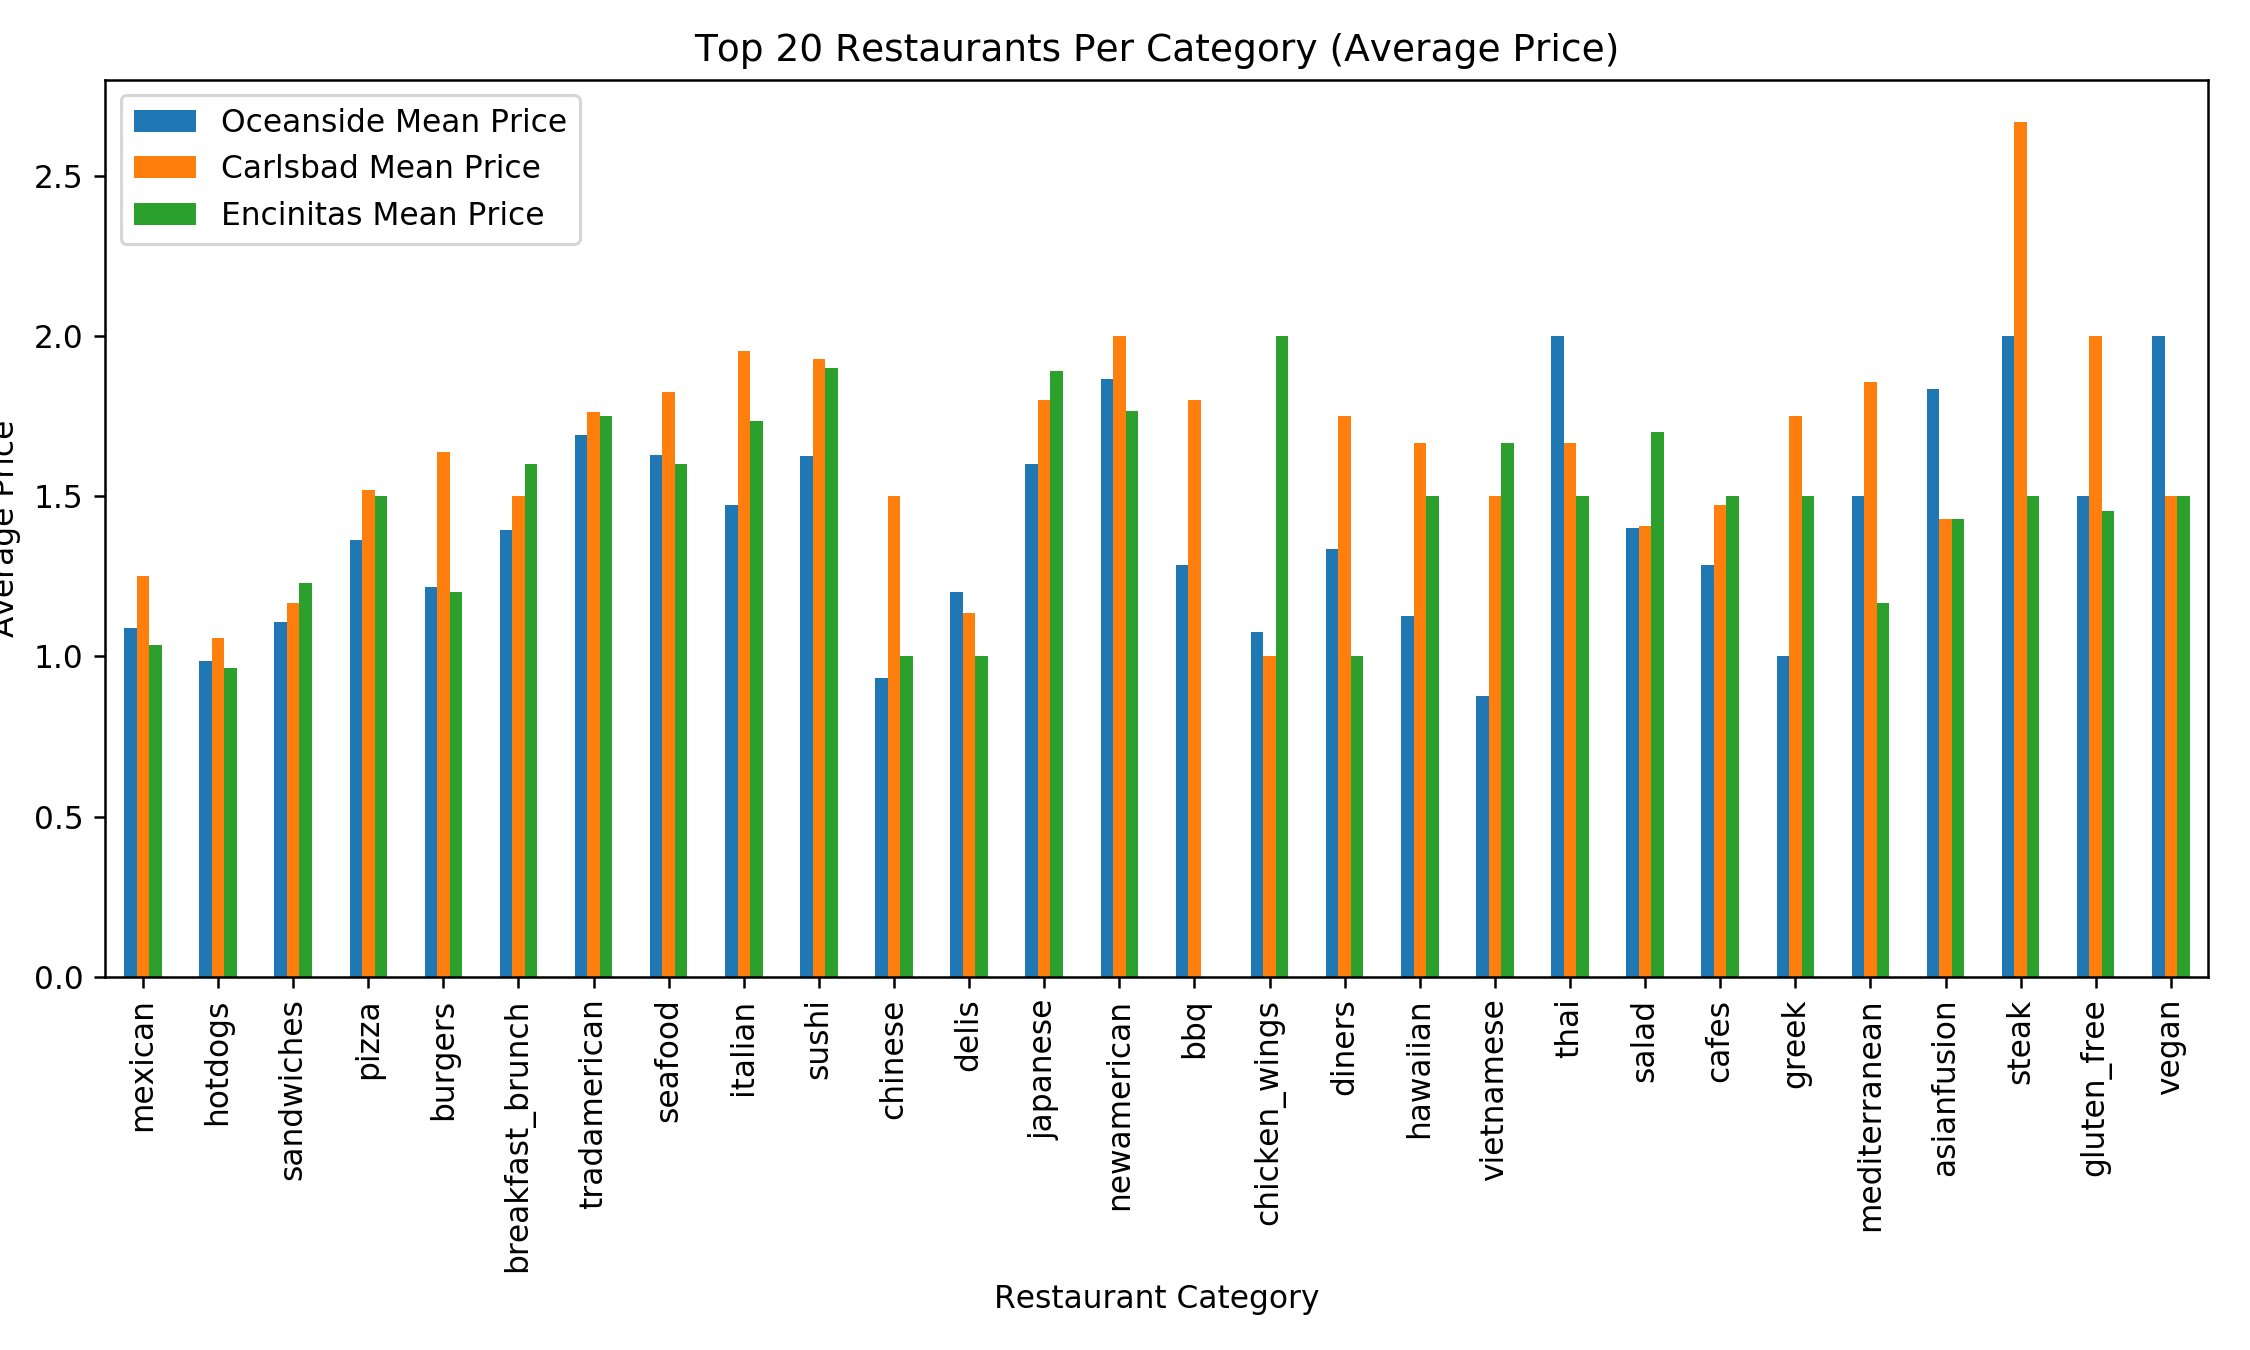

In [134]:
oce_price_top20_count.plot(kind='bar', figsize=(10,6))
plt.title('Top 20 Restaurants Per Category (Average Price)')
plt.tight_layout()
plt.ylabel('Average Price')
plt.xlabel('Restaurant Category')
plt.savefig('new_OCE_top20_price.png')

In [115]:
#Total Asian Restaurant Count Per City

In [116]:
asian_categories = ['asianfusion','chinese','japanese','korean','mongolian','noodles','sushi','taiwanese','thai','vietnamese']
Total_Restaurant_df= total_restaurant_df.reset_index()
OCE_Asian_Restarants_total_count = Total_Restaurant_df.loc[Total_Restaurant_df['Category'].isin(asian_categories),:]
OCE_asian_restarants_total_count=OCE_Asian_Restarants_total_count.set_index('Category')
OCE_asian_restarants_total_count

Oceanside,CA  Encinitas,CA  Carlsbad,CA
Category                                            
asianfusion             6             7            7
chinese                15             6           10
japanese               15             9           15
korean                  2             2            2
mongolian               0             0            1
noodles                 3             2            2
sushi                  16            10           14
taiwanese               0             0            0
thai                    8             6            3
vietnamese              8             3            2

<IPython.core.display.Javascript object>


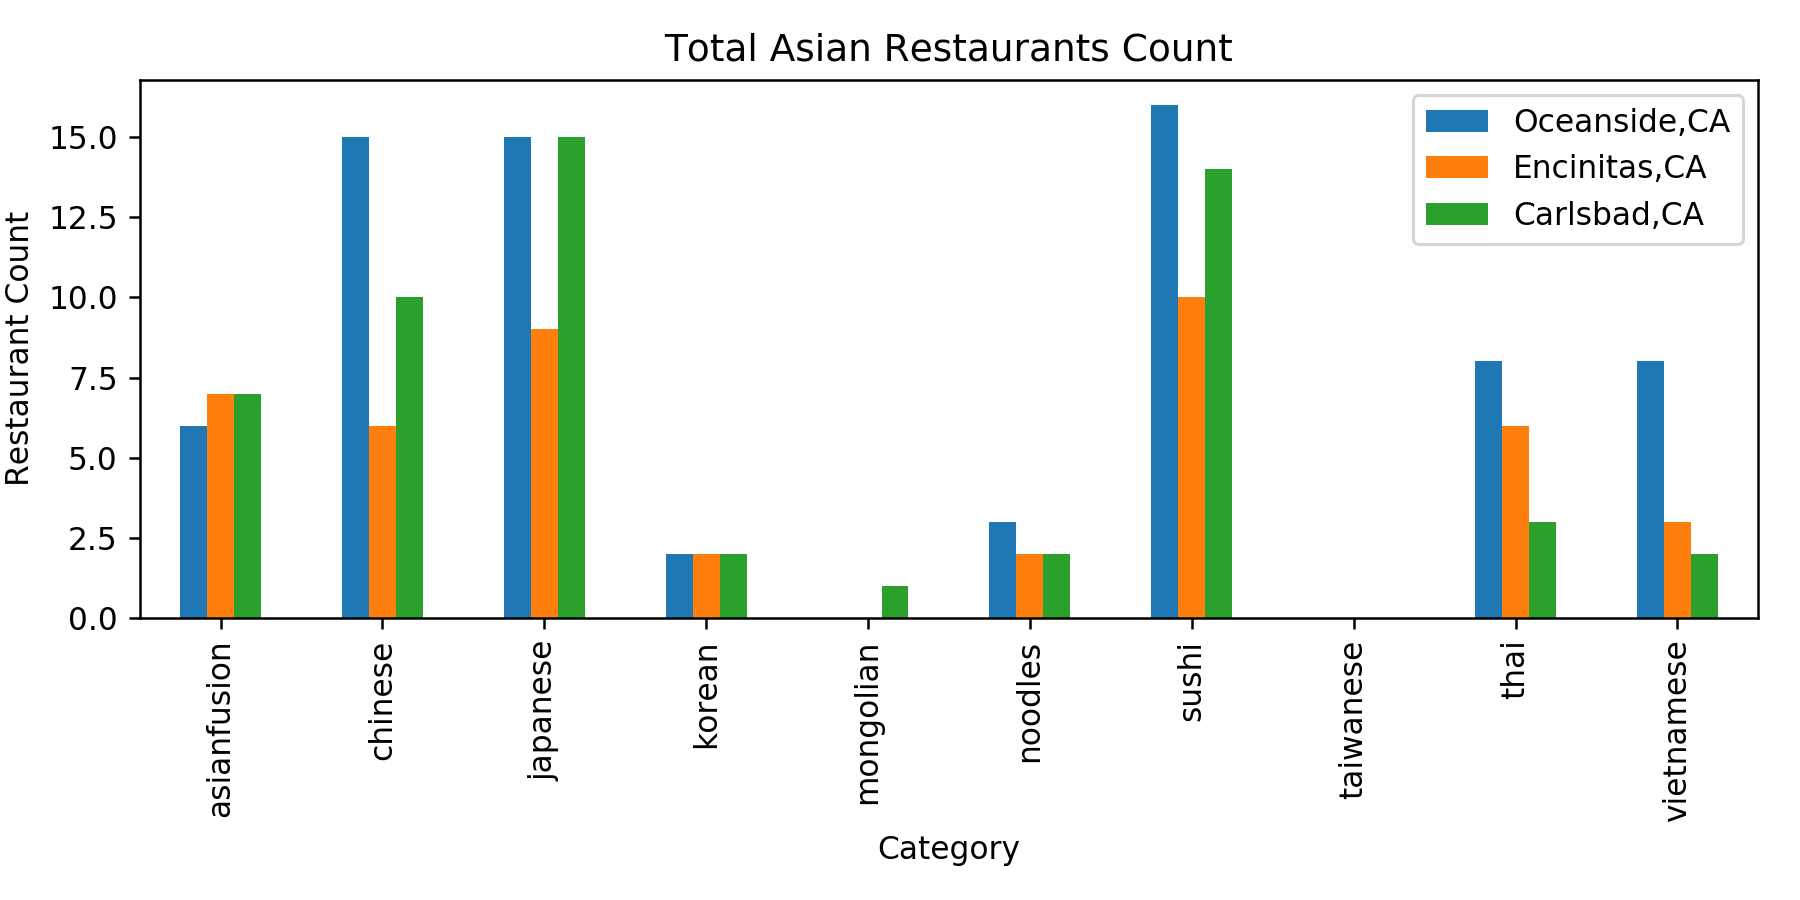

In [117]:
OCE_asian_restarants_total_count.plot(kind="bar", figsize=(8,4))
plt.title("Total Asian Restaurants Count")
plt.ylabel("Restaurant Count")
plt.savefig('asian_rest_count.png')
plt.tight_layout()

In [118]:
#Average Asian Restaurant Rating

In [119]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongolian','noodles','sushi','taiwanese','thai','vietnamese']
OCE_Restaurant_Rating = OCE_restaurant_rating.reset_index()
OCE_Asian_Restaurants_rating_mean = OCE_Restaurant_Rating.loc[OCE_Restaurant_Rating['Category'].isin(asian_categories),:]
OCE_Asian_restaurants_rating_mean = OCE_Asian_Restaurants_rating_mean.set_index('Category')
OCE_Asian_restaurants_rating_mean

Avg Oceanside Restaurant Rating  Avg Carlsbad Restaurant Rating  \
Category                                                                       
asianfusion                         3.666667                        3.583333   
chinese                             3.375000                        3.055556   
japanese                            3.964286                        3.714286   
korean                              3.750000                        3.750000   
noodles                             3.666667                        3.250000   
sushi                               4.033333                        3.821429   
thai                                4.187500                        3.333333   
vietnamese                          4.062500                        3.500000   
mongolian                                NaN                        3.500000   

             Avg Encinitas Restaurant Rating  
Category                                      
asianfusion                         3.833333  
chinese                             3.500000  
japanese                            4.111111  
korean                              4.000000  
noodles                             3.750000  
sushi                               4.000000  
thai                                4.000000  
vietnamese                          3.833333  
mongolian                                NaN

<IPython.core.display.Javascript object>


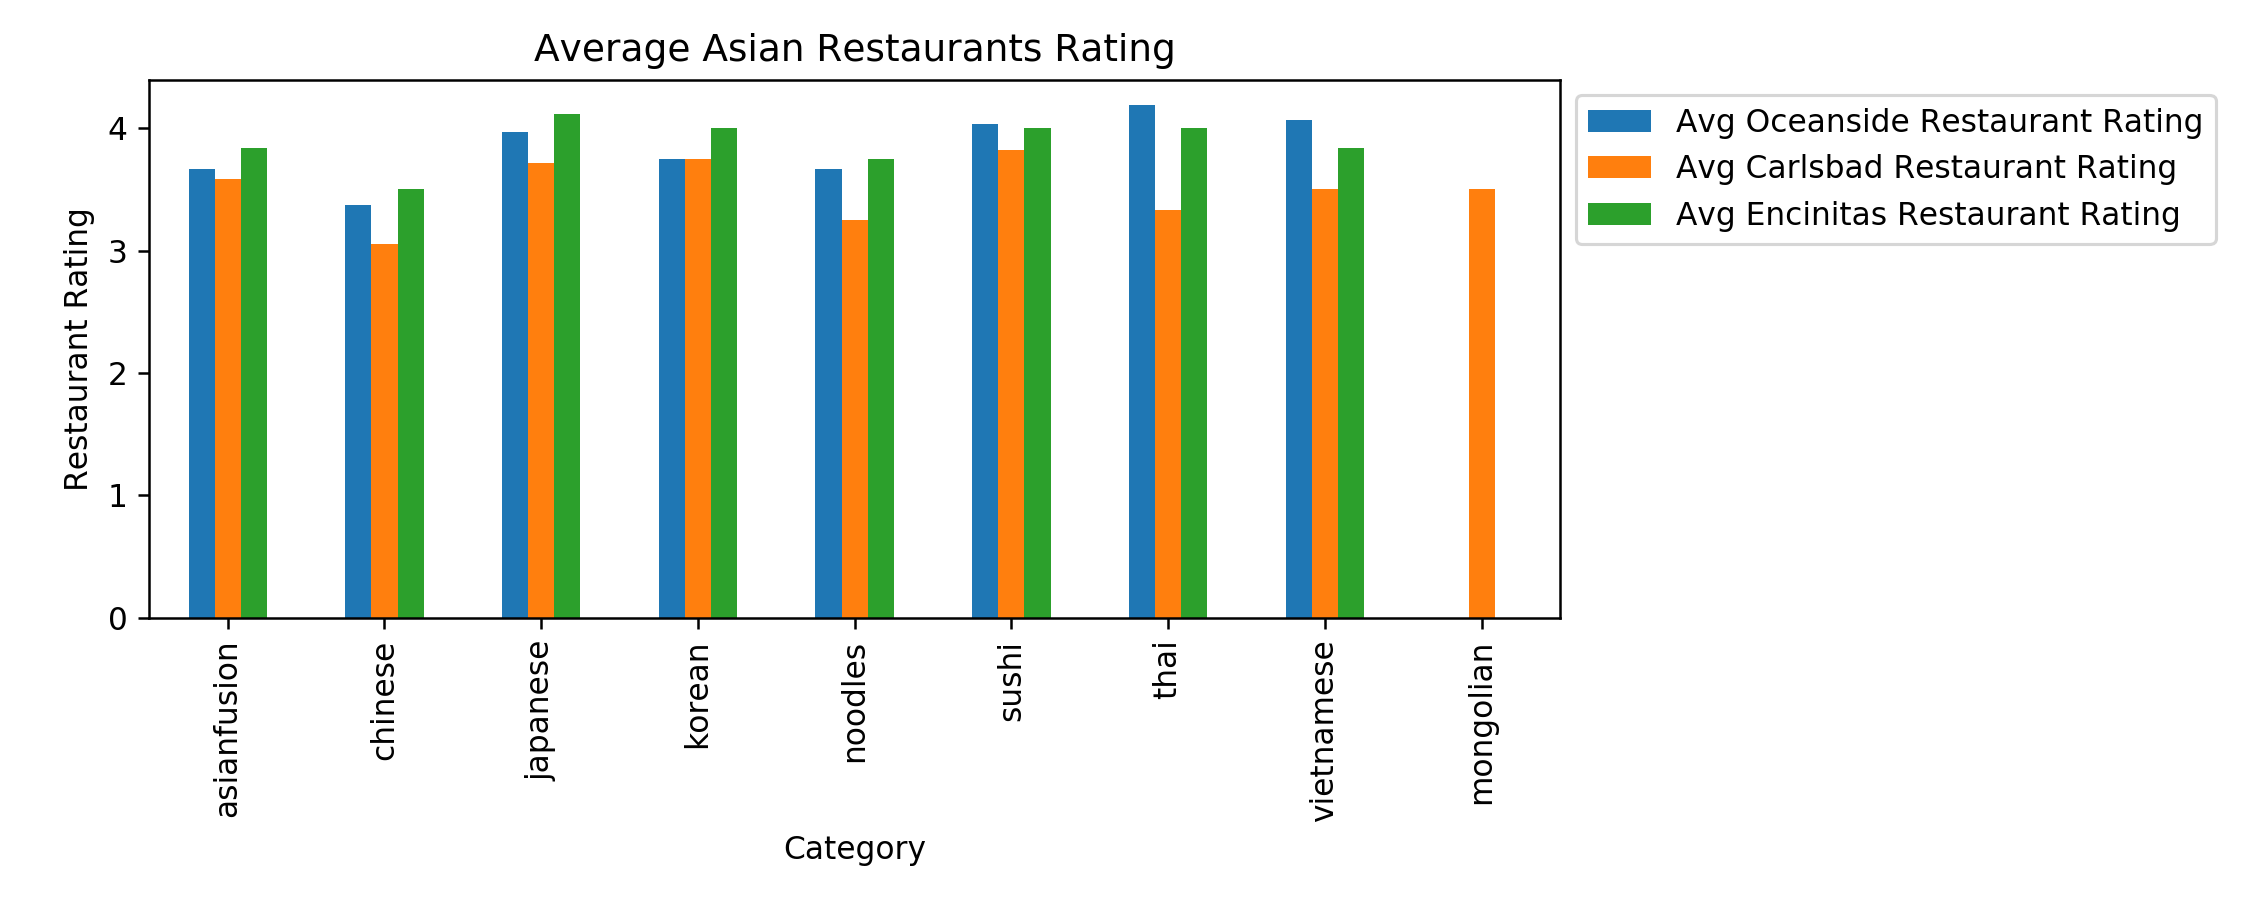

In [120]:
OCE_Asian_restaurants_rating_mean.plot(kind="bar", figsize=(10,4)).legend(bbox_to_anchor=(1, 1))
plt.title('Average Asian Restaurants Rating')
plt.ylabel("Restaurant Rating")
plt.savefig('asian_rest_rating.png')
plt.tight_layout()

In [121]:
#Asian Restaurants Total Review Count

In [122]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongolian','noodles','sushi','taiwanese','thai','vietnamese']
OCE_Reviews_count_df = OCE_review_count_df.reset_index()
OCE_Asian_Restarants_review_count = OCE_Reviews_count_df.loc[OCE_Reviews_count_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_review_count = OCE_Asian_Restarants_review_count.set_index('Category')
OCE_Asian_Restarants_review_count

Oceanside Review Count  Carlsbad Review Count  \
Category                                                     
asianfusion                  2306.0                 1777.0   
chinese                      1779.0                 1443.0   
japanese                     5289.0                 4887.0   
korean                        264.0                  533.0   
noodles                      1088.0                  672.0   
sushi                        6052.0                 6266.0   
thai                         2674.0                  890.0   
vietnamese                   2454.0                   92.0   
mongolian                       NaN                   52.0   

             Encinitas Review Count  
Category                             
asianfusion                  1635.0  
chinese                       718.0  
japanese                     2080.0  
korean                        493.0  
noodles                       227.0  
sushi                        2885.0  
thai                         1131.0  
vietnamese                    916.0  
mongolian                       NaN

<IPython.core.display.Javascript object>


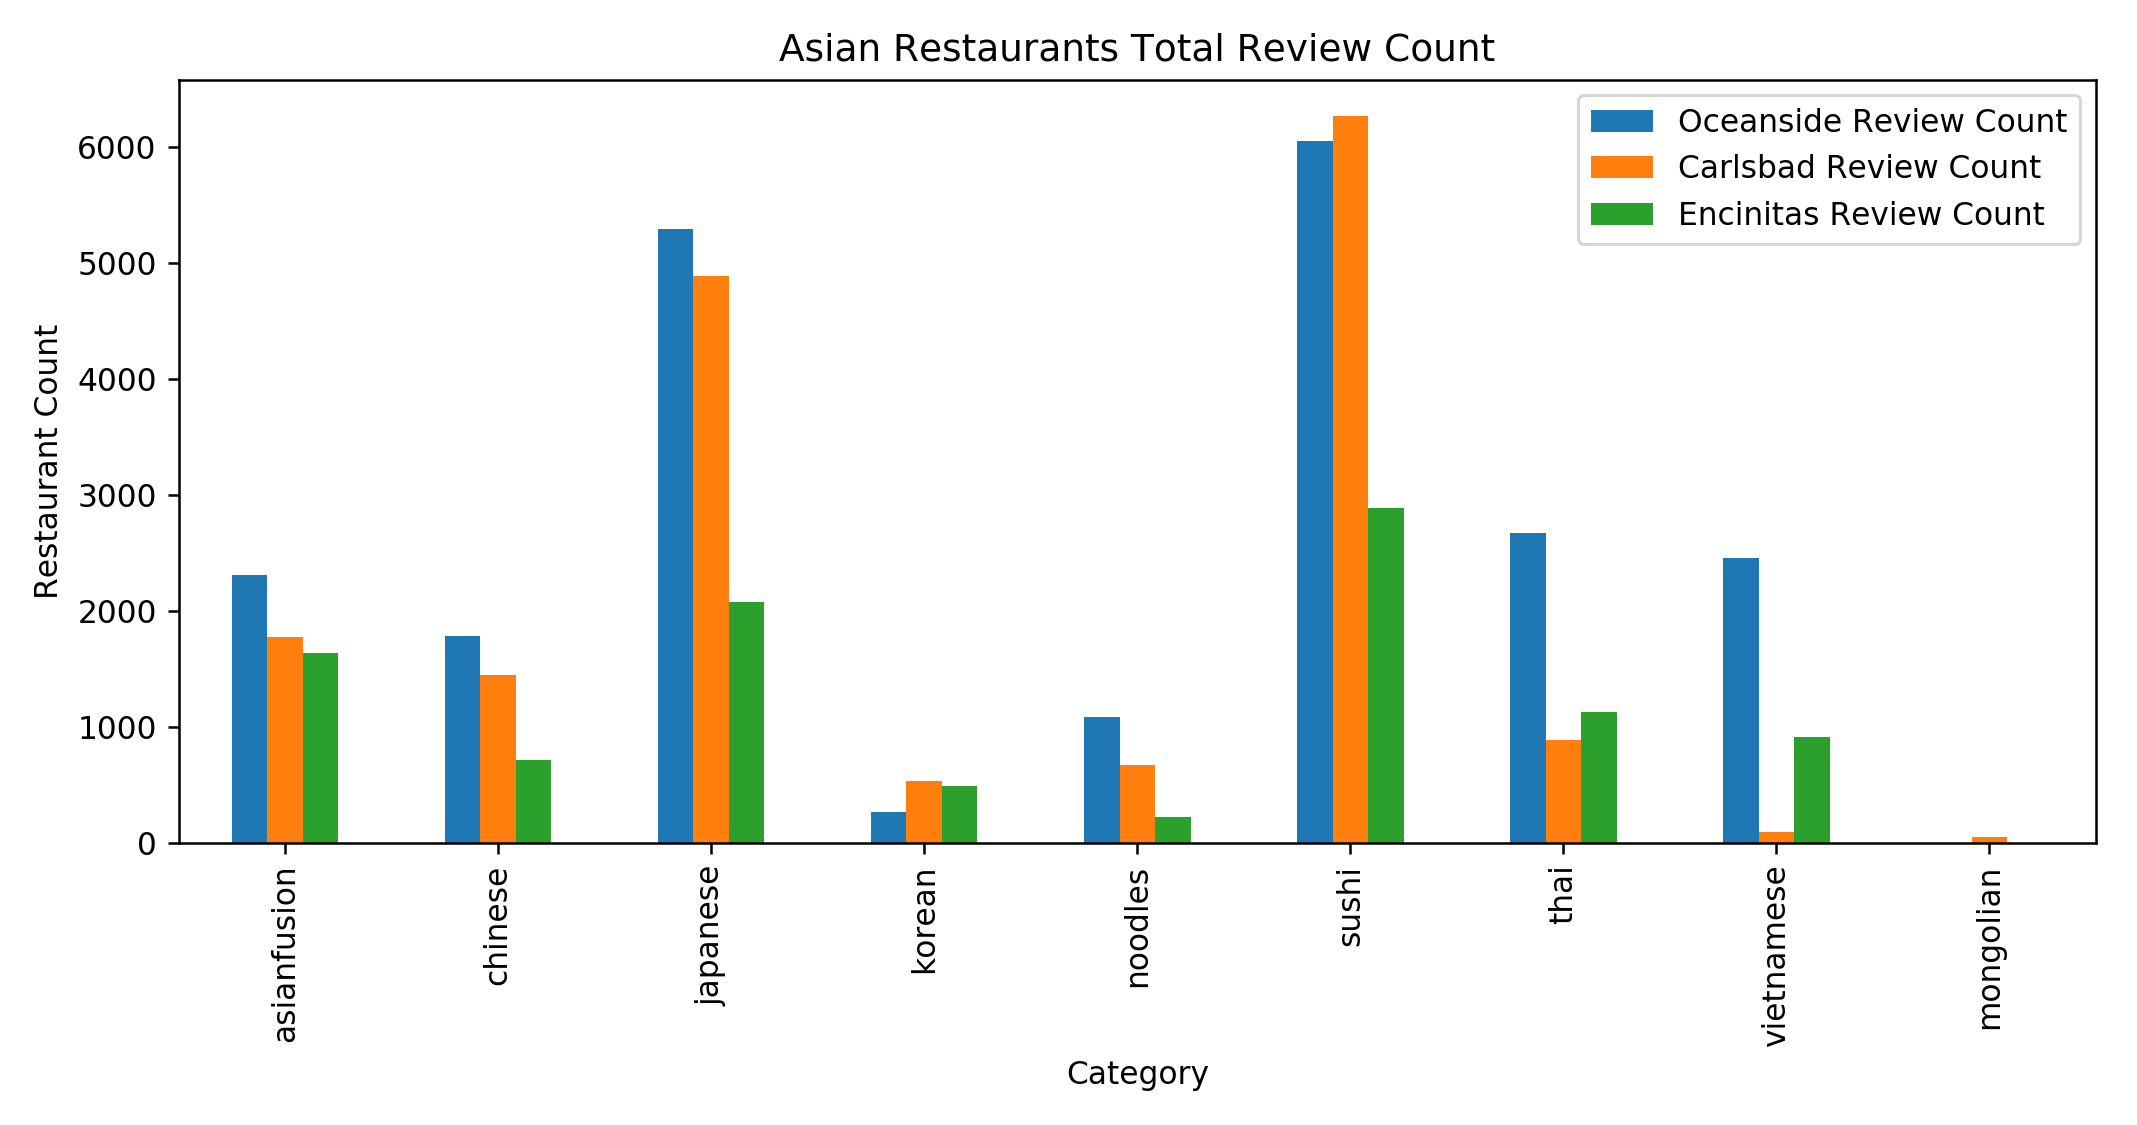

In [123]:
OCE_Asian_Restarants_review_count.plot(kind="bar",figsize=(9.5,5)).legend(bbox_to_anchor=(1, 1))
plt.title('Asian Restaurants Total Review Count')
plt.ylabel('Restaurant Count')
plt.tight_layout()
plt.savefig('OCE_asian_rest_review_count.png')

In [124]:
#Asian Restaurant Mean Price

In [125]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongolian','noodles','sushi','taiwanese','thai','vietnamese']
OCE_price_mean_df.reset_index(inplace=True)
OCE_Asian_Restarants_Price = OCE_price_mean_df.loc[OCE_price_mean_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_Price = OCE_Asian_Restarants_Price.set_index('Category')
OCE_Asian_Restarants_Price

Oceanside Mean Price  Carlsbad Mean Price  Encinitas Mean Price
Category                                                                    
asianfusion              1.833333             1.428571              1.428571
chinese                  0.933333             1.500000              1.000000
japanese                 1.600000             1.800000              1.888889
korean                   2.000000             2.000000              1.000000
noodles                  1.333333             1.500000              1.500000
sushi                    1.625000             1.928571              1.900000
thai                     2.000000             1.666667              1.500000
vietnamese               0.875000             1.500000              1.666667
mongolian                     NaN             1.000000                   NaN

<IPython.core.display.Javascript object>


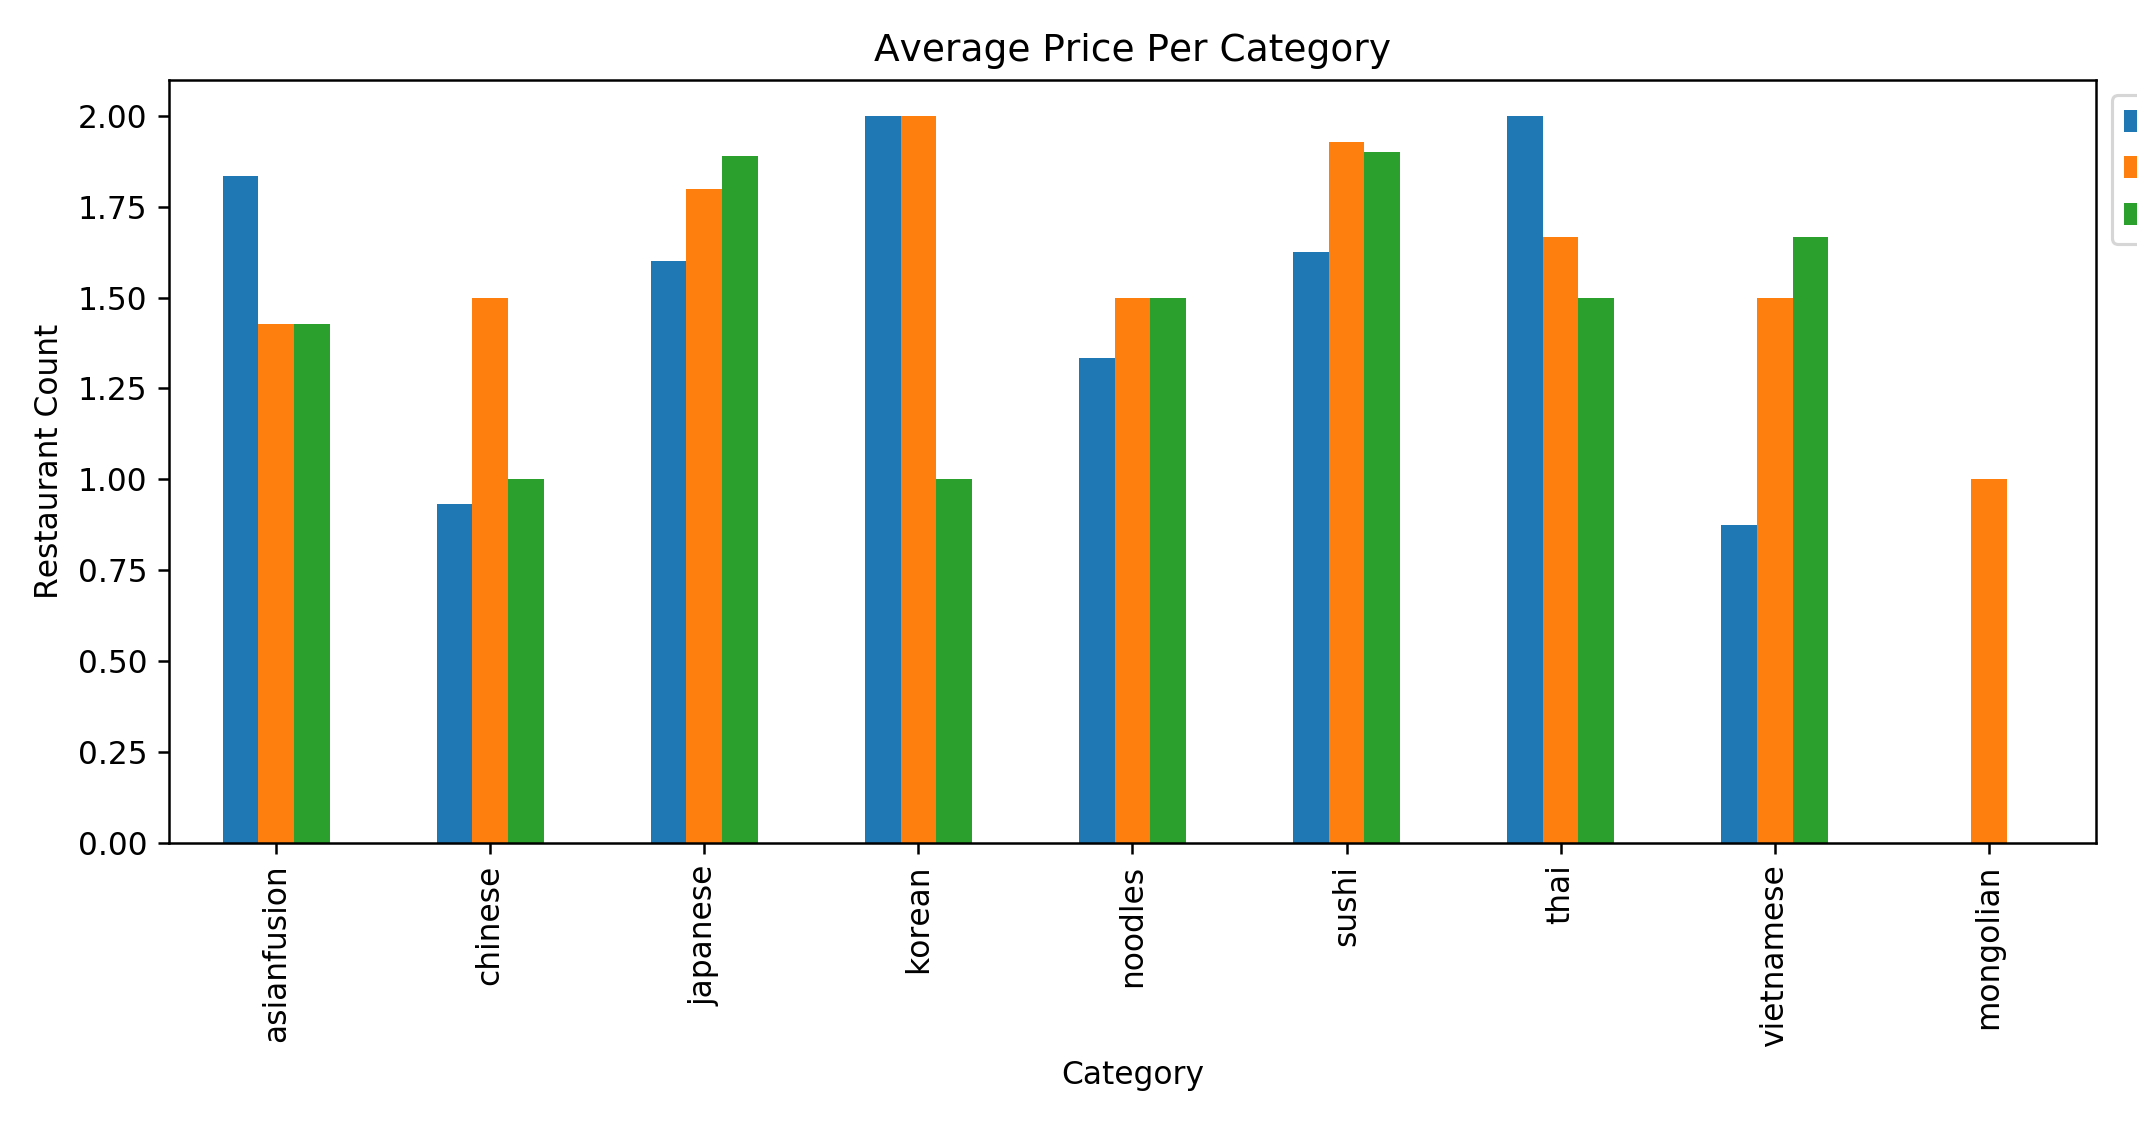

In [126]:
OCE_Asian_Restarants_Price.plot(kind='bar', figsize=(9.5,5)).legend(bbox_to_anchor=(1, 1))
plt.title("Average Price Per Category")
plt.ylabel("Restaurant Count")
plt.savefig('OCE_asian_rest_avg_price.png')
plt.tight_layout()